In [98]:
# Importaciones
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
from geopy import distance

Código para explorar los datos de los Sensores Madrid.

In [99]:
# Constantes
df_encabezados = ["id", "fecha", "tipo_elem", "intensidad", "ocupacion", "carga", "vmed", "error", "periodo_integracion"]
atributos = ["intensidad", "ocupacion", "carga", "vmed"]

In [100]:
# df = pd.read_csv(sys.argv[1], sep=';', quotechar='"')
df = pd.read_csv('11-2024_m30.csv', sep=';', quotechar='"')
# df = pd.read_csv('/home/carlos/ubuntu_transfer/temporal_series/sensores_madrid/data_magist/07-2023.csv', sep=';', quotechar='"')
filas = df.shape[0]
print(df.head())
print("Filas:",filas)

     id                fecha tipo_elem  intensidad  ocupacion  carga  vmed  \
0  3488  2024-11-01 00:00:00       M30        1705          4     40  84.0   
1  3488  2024-11-01 00:15:00       M30        1668          5     39  85.0   
2  3488  2024-11-01 00:30:00       M30        1481          4     34  86.0   
3  3488  2024-11-01 00:45:00       M30        1521          3     36  87.0   
4  3488  2024-11-01 01:00:00       M30        1404          3     32  86.0   

  error  periodo_integracion  
0     N                   15  
1     N                   15  
2     N                   15  
3     N                   15  
4     N                   15  
Filas: 786090


In [101]:
diccSensores = {}
diccFechas = {}
for x in range(filas):
    s = df['id'][x]
    if s not in diccSensores:
        diccSensores[s] = 1
    else:
        diccSensores[s] += 1
    f = df['fecha'][x]
    if f not in diccFechas:
        diccFechas[f] = 1
    else:
        diccFechas[f] += 1
print("Sensores distintos:", len(diccSensores))
print("Fechas distintas:", len(diccFechas))

Sensores distintos: 286
Fechas distintas: 2880


In [102]:
contI = 0
maxData = 0
maxID = 0
for d in diccSensores:
    print(contI, d, "posee", diccSensores[d], "elementos.")
    if(diccSensores[d] > maxData):
        maxData = diccSensores[d]
        maxID = d
print("La mayor cantidad de muestras es:", maxData)

0 3488 posee 2871 elementos.
0 3489 posee 2880 elementos.
0 3490 posee 2795 elementos.
0 3491 posee 2860 elementos.
0 3492 posee 2866 elementos.
0 3493 posee 2880 elementos.
0 3494 posee 2880 elementos.
0 3495 posee 2880 elementos.
0 3496 posee 2880 elementos.
0 3510 posee 97 elementos.
0 3521 posee 2876 elementos.
0 3531 posee 2880 elementos.
0 3532 posee 2880 elementos.
0 3533 posee 2870 elementos.
0 3536 posee 2880 elementos.
0 3538 posee 2880 elementos.
0 3539 posee 2880 elementos.
0 3558 posee 2880 elementos.
0 3559 posee 2869 elementos.
0 3560 posee 2880 elementos.
0 3561 posee 2880 elementos.
0 3597 posee 2880 elementos.
0 3598 posee 2880 elementos.
0 3599 posee 2880 elementos.
0 3600 posee 2880 elementos.
0 3611 posee 2871 elementos.
0 3703 posee 2880 elementos.
0 3704 posee 2880 elementos.
0 3705 posee 2880 elementos.
0 3706 posee 2880 elementos.
0 3761 posee 2880 elementos.
0 3762 posee 2880 elementos.
0 3763 posee 2880 elementos.
0 3797 posee 2880 elementos.
0 3799 posee 280

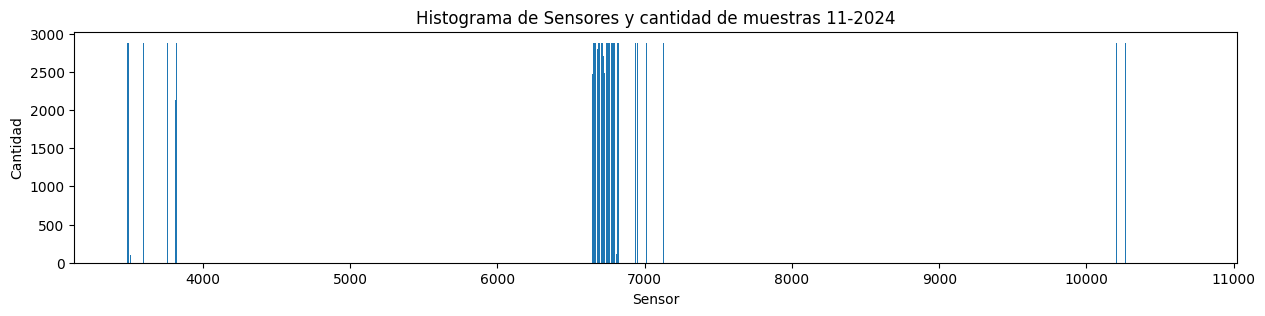

In [103]:
sensores = list(diccSensores.keys())
sensores.sort()
cants = []
for s in sensores:
    cants.append(diccSensores[s])
plt.figure(figsize=(15,3))
plt.bar(sensores, cants)
plt.xlabel("Sensor")
plt.ylabel("Cantidad")
plt.title("Histograma de Sensores y cantidad de muestras 11-2024")
plt.savefig('images/histograma_11-2024_sensor_cant.png', bbox_inches='tight')
plt.show()
plt.close()

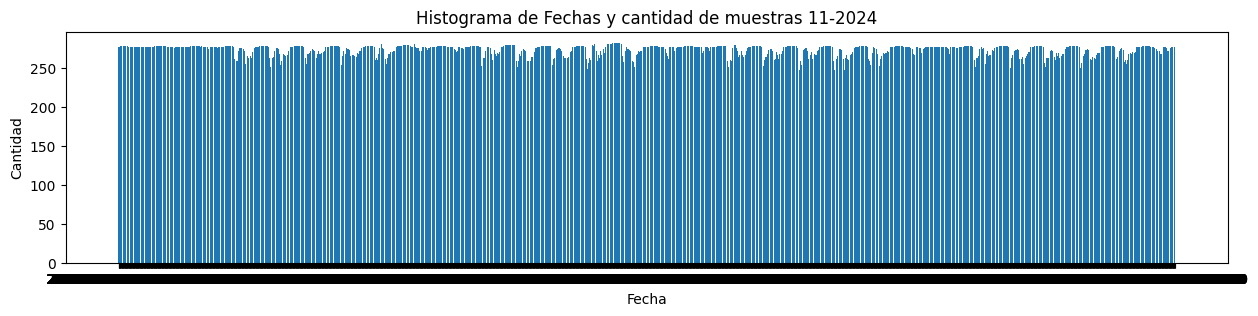

In [104]:
fechas = list(diccFechas.keys())
fechas.sort()
cants = []
for f in fechas:
    cants.append(diccFechas[f])
plt.figure(figsize=(15,3))
plt.bar(fechas, cants)
plt.xlabel("Fecha")
plt.ylabel("Cantidad")
plt.title("Histograma de Fechas y cantidad de muestras 11-2024")
plt.savefig('images/histograma_11-2024_fecha_cant.png', bbox_inches='tight')
plt.show()
plt.close()

In [105]:
counter = 0
for f in fechas:
    print(counter, "-", f, "tiene", diccFechas[f], "registros.")
    counter += 1

0 - 2024-11-01 00:00:00 tiene 277 registros.
1 - 2024-11-01 00:15:00 tiene 277 registros.
2 - 2024-11-01 00:30:00 tiene 277 registros.
3 - 2024-11-01 00:45:00 tiene 277 registros.
4 - 2024-11-01 01:00:00 tiene 278 registros.
5 - 2024-11-01 01:15:00 tiene 278 registros.
6 - 2024-11-01 01:30:00 tiene 278 registros.
7 - 2024-11-01 01:45:00 tiene 278 registros.
8 - 2024-11-01 02:00:00 tiene 278 registros.
9 - 2024-11-01 02:15:00 tiene 278 registros.
10 - 2024-11-01 02:30:00 tiene 278 registros.
11 - 2024-11-01 02:45:00 tiene 278 registros.
12 - 2024-11-01 03:00:00 tiene 278 registros.
13 - 2024-11-01 03:15:00 tiene 278 registros.
14 - 2024-11-01 03:30:00 tiene 278 registros.
15 - 2024-11-01 03:45:00 tiene 278 registros.
16 - 2024-11-01 04:00:00 tiene 278 registros.
17 - 2024-11-01 04:15:00 tiene 278 registros.
18 - 2024-11-01 04:30:00 tiene 278 registros.
19 - 2024-11-01 04:45:00 tiene 278 registros.
20 - 2024-11-01 05:00:00 tiene 278 registros.
21 - 2024-11-01 05:15:00 tiene 278 registros

In [106]:
posFechas = {}
pos = 0
for f in fechas:
    posFechas[f] = pos
    pos += 1

posSensores = {}
pos = 0
for s in sensores:
    posSensores[s] = pos
    pos += 1

grillaMapaCalor = np.zeros((len(sensores),len(fechas)))
for x in range(filas):
    s = df['id'][x]
    f = df['fecha'][x]
    ps = posSensores[s]
    pf = posFechas[f]
    grillaMapaCalor[ps][pf] += 1
gmpMin = grillaMapaCalor.min()

gmpMax = grillaMapaCalor.max()

# Configurar paleta de colores
cmap = sns.color_palette("coolwarm", as_cmap=True)


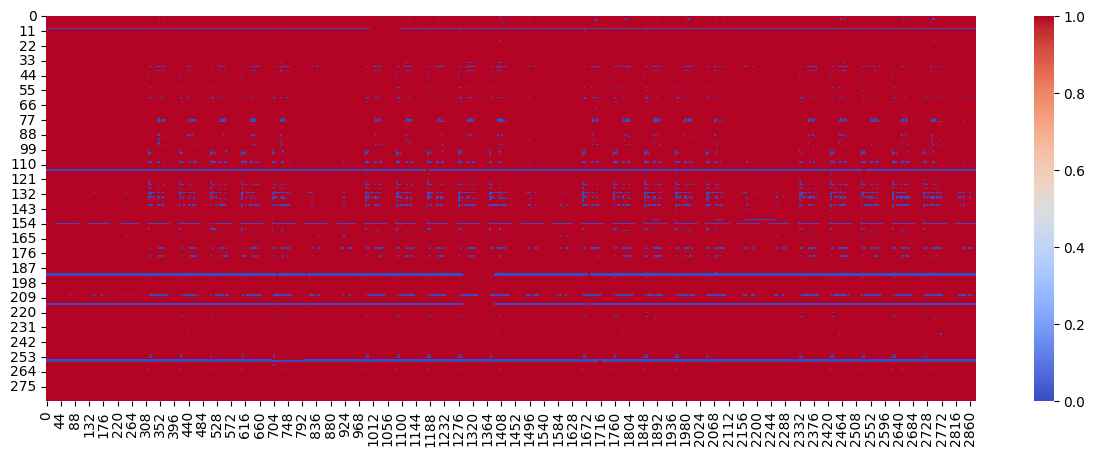

In [107]:
# Crear un mapa de calor
plt.figure(figsize=(15,5))
#plt.axis('off')
heatmap = sns.heatmap(grillaMapaCalor, cmap=cmap, vmin=gmpMin, vmax=gmpMax)
#plt.savefig('image_filename.png', bbox_inches='tight')
plt.show()
plt.close()

In [108]:
grillaIntensidad = np.zeros((len(sensores),len(fechas)))
grillaOcupacion = np.zeros((len(sensores),len(fechas)))
grillaCarga = np.zeros((len(sensores),len(fechas)))
grillaVelocidad = np.zeros((len(sensores),len(fechas)))

listaFilasNan = []

for x in range(filas):
    s = df['id'][x]
    f = df['fecha'][x]
    ps = posSensores[s]
    pf = posFechas[f]
    
    if not math.isnan(df['intensidad'][x]):
        grillaIntensidad[ps][pf] = int(df['intensidad'][x])
    else:
        listaFilasNan.append(x)
    
    if not math.isnan(df['ocupacion'][x]):
        grillaOcupacion[ps][pf] = int(df['ocupacion'][x])
    else:
        listaFilasNan.append(x)
    
    if not math.isnan(df['carga'][x]):
        grillaCarga[ps][pf] = int(df['carga'][x])
    else:
        listaFilasNan.append(x)
    
    if not math.isnan(df['vmed'][x]):
        grillaVelocidad[ps][pf] = int(df['vmed'][x])
    else:
        listaFilasNan.append(x)


In [109]:
print("Total filas:", filas)
cantFilasNan = len(listaFilasNan)
porc = float(cantFilasNan/filas*100)
print(cantFilasNan, "nans encontrados en los datos (", format(porc,".4f"), "%)")
listaIdsSensoresNan = {}
for i in listaFilasNan:
    if df['id'][i] not in listaIdsSensoresNan:
        listaIdsSensoresNan[df['id'][i]] = 1
    else:
        listaIdsSensoresNan[df['id'][i]] += 1
print(len(listaIdsSensoresNan), "sensores de la M30 con nan")

Total filas: 786090
10830 nans encontrados en los datos ( 1.3777 %)
117 sensores de la M30 con nan


In [110]:
ids = [6704,11376]
for id1 in ids:
    if id1 in listaIdsSensoresNan:
        print(id1, "en lista sensores nan con", listaIdsSensoresNan[id1])
    else:
        print(id1, "sin valores nan")        

6704 sin valores nan
11376 sin valores nan


In [111]:
#Compara valores de dos sensores


In [112]:
for i in listaIdsSensoresNan:
    print(i, listaIdsSensoresNan[i])

3488 4
3489 7
3493 25
3496 25
3510 97
3532 38
3533 38
3538 6
3559 5
3561 5
3706 4
3762 1
3800 19
3817 18
3821 14
3827 93
3838 18
6640 6
6642 3
6643 5
6645 7
6646 1
6652 1
6664 1
6668 4
6669 9
6670 1
6671 223
6673 2
6674 1
6678 26
6682 11
6684 10
6686 10
6689 23
6690 5
6691 10
6694 1
6702 2880
6703 12
6705 23
6707 18
6712 33
6716 16
6731 2
6735 20
6738 15
6739 16
6740 26
6741 6
6742 23
6744 1
6745 3
6748 9
6750 2
6751 261
6755 1
6759 1
6762 1
6766 40
6774 30
6783 1
6784 11
6786 3
6787 97
6788 97
6792 11
6794 17
6795 45
6796 5
6797 44
6799 15
6800 15
6803 1
6806 29
6808 21
6809 97
6810 97
6815 44
6816 1
6817 11
6819 1
6820 1
6823 2
6932 5
6934 8
6935 4
6939 1
6941 2424
6944 4
6948 47
6950 2
6951 1
7014 1
7015 9
7124 2874
7125 2
7126 5
7128 18
7131 2
10171 1
10173 97
10178 3
10179 1
10194 19
10199 13
10200 54
10201 40
10202 1
10211 19
10266 16
10267 8
10268 8
10269 24
10659 92
10660 121
10662 24


In [113]:
gIMin = grillaIntensidad.min()
gIMax = grillaIntensidad.max()
gOMin = grillaOcupacion.min()
gOMax = grillaOcupacion.max()
gCMin = grillaCarga.min()
gCMax = grillaCarga.max()
gVMin = grillaVelocidad.min()
gVMax = grillaVelocidad.max()

In [114]:
def graficaMapaCalor(grillaValores, titulo):
    mini = grillaValores.min()
    maxi = grillaValores.max()
    plt.figure(figsize=(15,5))
    plt.title(titulo)
    #plt.axis('off')
    heatmap = sns.heatmap(grillaValores, cmap=cmap, vmin=mini, vmax=maxi)
    #plt.savefig('image_filename.png', bbox_inches='tight')
    plt.show()
    plt.close()

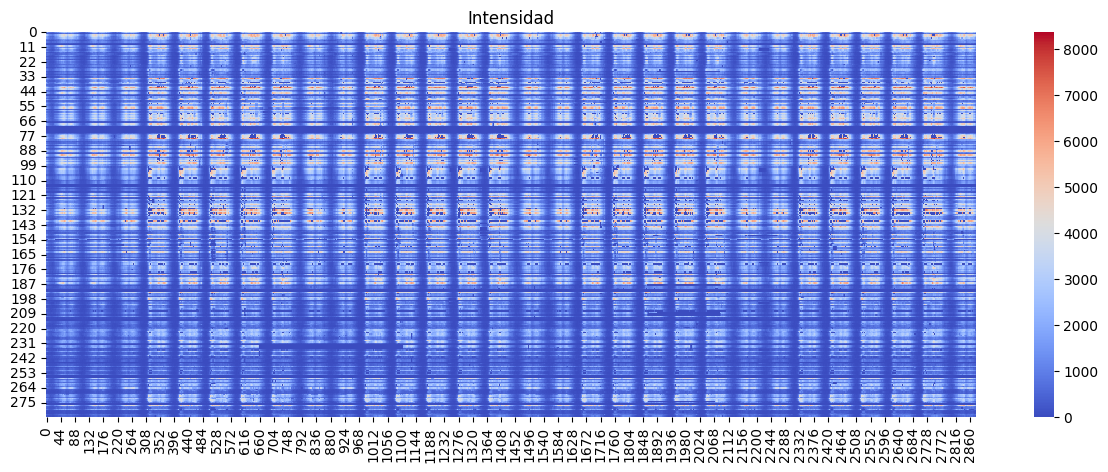

In [115]:
graficaMapaCalor(grillaIntensidad, "Intensidad")

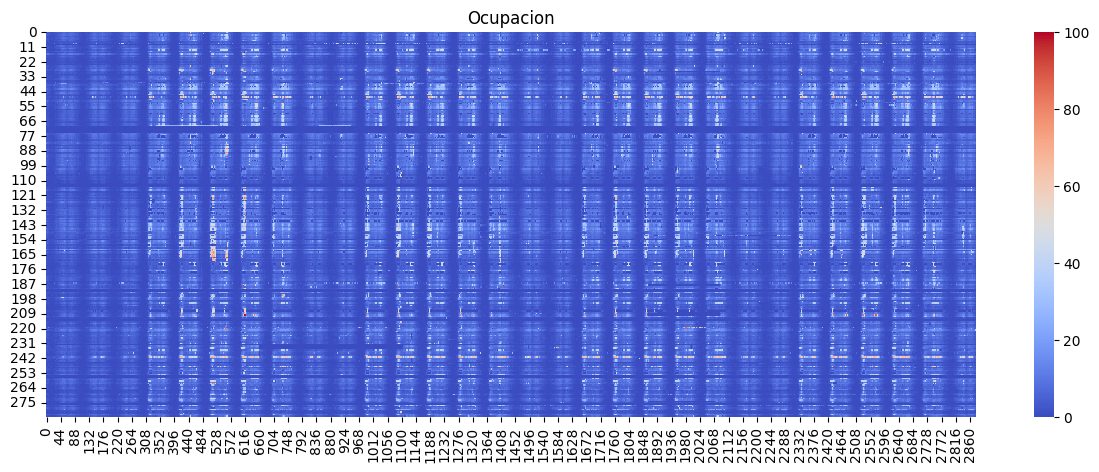

In [116]:
graficaMapaCalor(grillaOcupacion, "Ocupacion")

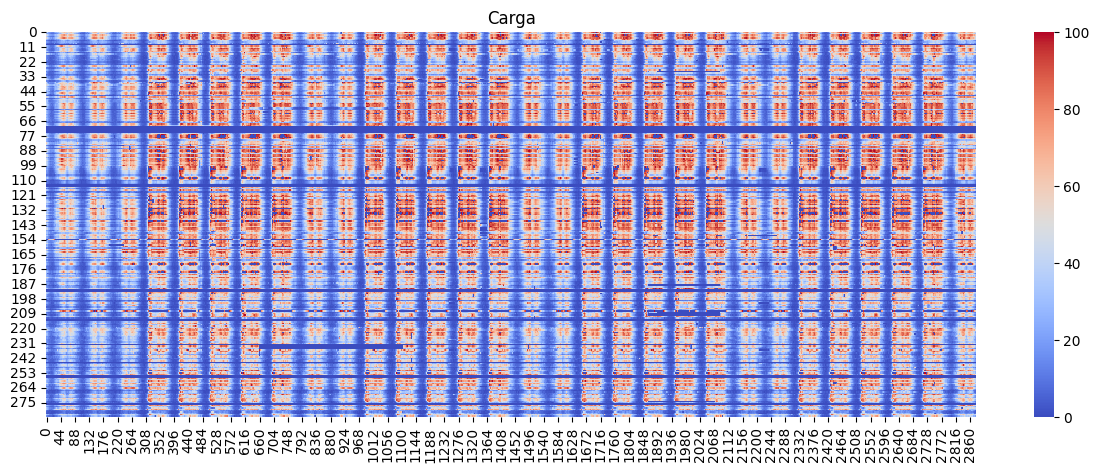

In [117]:
graficaMapaCalor(grillaCarga, "Carga")

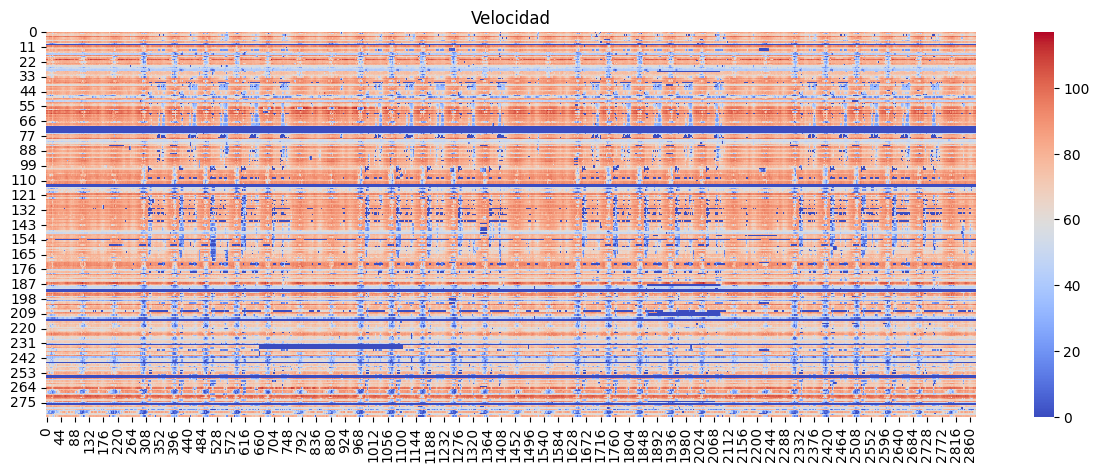

In [118]:
graficaMapaCalor(grillaVelocidad, "Velocidad")

In [119]:
# Función para graficas 4 mapas de calor
def grafica4MapasCalor(g1, g2, g3, g4, t1, t2, t3, t4, titulo, archivo):
    fig, axs = plt.subplots(2, 2, figsize=(15,10))
    sns.heatmap(g1, ax=axs[0,0], cmap=cmap)
    axs[0,0].set_title(t1)
    sns.heatmap(g2, ax=axs[0,1], cmap=cmap)
    axs[0,1].set_title(t2)
    sns.heatmap(g3, ax=axs[1,0], cmap=cmap)
    axs[1,0].set_title(t3)
    sns.heatmap(g4, ax=axs[1,1], cmap=cmap)
    axs[1,1].set_title(t4)
    fig.suptitle(titulo)
    fig.tight_layout()
    plt.savefig(archivo, bbox_inches='tight')
    plt.show()
    plt.close()

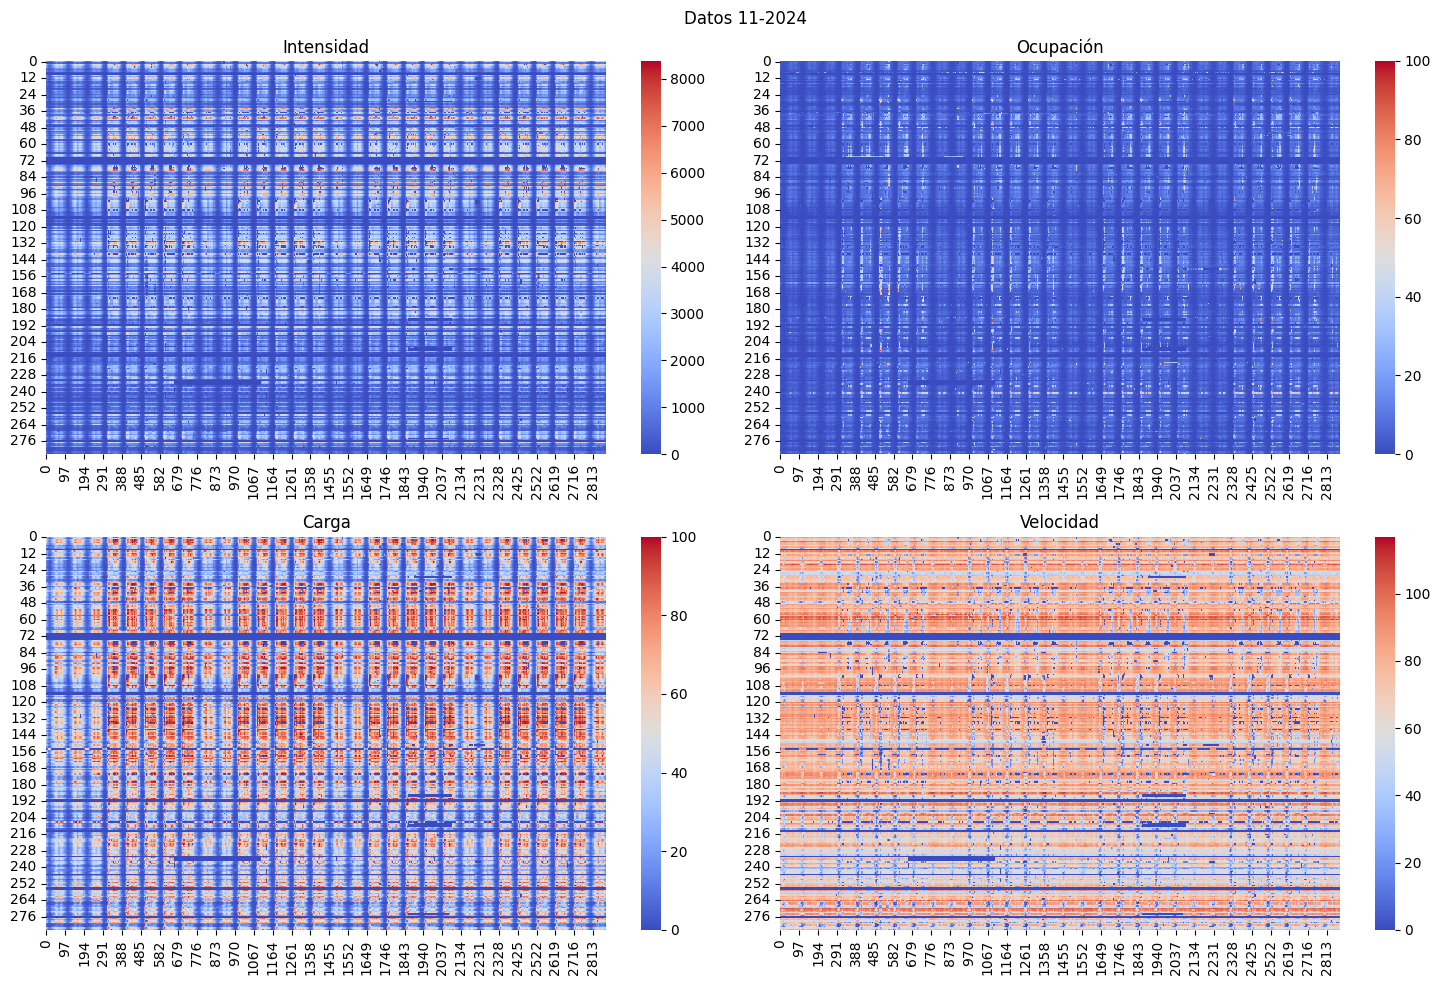

In [120]:
#Gráfica con las 4 mediciones
grafica4MapasCalor(grillaIntensidad,grillaOcupacion,grillaCarga,grillaVelocidad,"Intensidad","Ocupación","Carga","Velocidad","Datos 11-2024","images/pm_11-2024_v2.png")

In [121]:
for e in df_encabezados:
    print(e, end="\t")
print("")
for x in range(0,filas,1000):
    for e in df_encabezados:
        print(df[e][x], end="\t")
    print("")

id	fecha	tipo_elem	intensidad	ocupacion	carga	vmed	error	periodo_integracion	
3488	2024-11-01 00:00:00	M30	1705	4	40	84.0	N	15	
3488	2024-11-11 10:30:00	M30	2464	7	56	84.0	N	15	
3488	2024-11-21 22:15:00	M30	2596	7	58	84.0	N	15	
3489	2024-11-02 08:15:00	M30	172	1	11	76.0	N	15	
3489	2024-11-12 18:15:00	M30	729	7	44	73.0	N	15	
3489	2024-11-23 04:15:00	M30	104	1	7	63.0	N	15	
3490	2024-11-03 14:15:00	M30	4857	10	81	65.0	N	15	
3490	2024-11-14 05:00:00	M30	413	0	8	75.0	N	15	
3490	2024-11-24 23:00:00	M30	2205	4	39	71.0	N	15	
3491	2024-11-05 17:30:00	M30	5616	9	96	84.0	N	15	
3491	2024-11-16 05:30:00	M30	476	0	8	100.0	N	15	
3491	2024-11-26 18:30:00	M30	5753	9	99	82.0	N	15	
3492	2024-11-07 05:00:00	M30	377	0	11	87.0	N	15	
3492	2024-11-17 16:45:00	M30	2693	7	73	73.0	N	15	
3492	2024-11-28 03:45:00	M30	232	0	7	86.0	N	15	
3493	2024-11-08 14:00:00	M30	2837	13	82	70.0	N	15	
3493	2024-11-19 00:00:00	M30	16	0	1	5.0	N	15	
3493	2024-11-29 10:00:00	M30	1711	6	52	77.0	N	15	
3494	2024-11-09 20:00:00	M30	992	6

In [122]:
data = pd.read_csv('pmed_ubicacion_11-2024_M30.csv', sep=';', quotechar='"')
data_encabezados = ["tipo_elem","distrito","id","cod_cent","nombre","utm_x","utm_y","longitud","latitud"]
numsensores = data.shape[0]
print("Cantidad de sensores",numsensores)

for e in data_encabezados:
    print(e, end="\t")
print("")
for x in range(0,numsensores,10):
    for e in data_encabezados:
        print(data[e][x], end="\t")
    print("")

Cantidad de sensores 305
tipo_elem	distrito	id	cod_cent	nombre	utm_x	utm_y	longitud	latitud	
M30	4	3488	PM10712	PM10712	444059.704099821	4474778.518240879	-3.65942038928967	40.42175658154508	
M30	8	3521	PM30001	PM30001	443156.142448223	4482615.358583339	-3.67077258118191	40.49229329544748	
M30	14	3561	PM30753	PM30753	444465.82208975	4474299.867547994	-3.65459160038659	40.41747183300103	
M30	12	3761	PM41261	PM41261	441400.441820167	4470302.301980738	-3.69035342460072	40.38124946523374	
M30	4	3818	PM10501	PM10501	444087.17664981	4476901.529542993	-3.65928331720551	40.44088364312868	
M30	15	3837	PM30461	PM30461	444315.841596641	4477456.246474723	-3.65663586080218	40.44589616490077	
M30	5	6646	PM10211	PM10211	443332.954939567	4479745.87008936	-3.66842984385959	40.46645577168144	
M30	5	6656	PM10441	nan	443918.394545558	4477435.358031015	-3.66132047593148	40.44568127568839	
M30	3	6667	PM30754	PM30754	443529.511073818	4474619.339316712	-3.66565573567384	40.42028679869755	
M30	3	6678	PM10985	P

In [123]:
diccCodId = {}
diccIdCod = {}
for index, row in data.iterrows():
    diccCodId[row['cod_cent']] = row['id']
    diccIdCod[row['id']] = row['cod_cent']
#print(diccCodId)
listaCodigos = list(diccCodId.keys())
listaCodigos.sort()
print(listaCodigos)

['PM10013', 'PM10021', 'PM10091', 'PM10092', 'PM10141', 'PM10142', 'PM10211', 'PM10212', 'PM10241', 'PM10242', 'PM10293', 'PM10341', 'PM10342', 'PM10343', 'PM10344', 'PM10401', 'PM10402', 'PM10441', 'PM10442', 'PM10444', 'PM10446', 'PM10447', 'PM10448', 'PM10471', 'PM10472', 'PM10486', 'PM10501', 'PM10502', 'PM10533', 'PM10561', 'PM10572', 'PM10578', 'PM10593', 'PM10611', 'PM10612', 'PM10661', 'PM10662', 'PM10711', 'PM10712', 'PM10714', 'PM10728', 'PM10764', 'PM10765', 'PM10766', 'PM10768', 'PM10831', 'PM10832', 'PM10861', 'PM10862', 'PM10865', 'PM10901', 'PM10902', 'PM10907', 'PM10941', 'PM10942', 'PM10945', 'PM10948', 'PM10981', 'PM10982', 'PM10985', 'PM11071', 'PM11074', 'PM11101', 'PM11102', 'PM11108', 'PM11161', 'PM11168', 'PM11201', 'PM11208', 'PM11301', 'PM11303', 'PM11981', 'PM12061', 'PM12067', 'PM12121', 'PM12122', 'PM12211', 'PM12241', 'PM12331', 'PM12342', 'PM12391', 'PM12397', 'PM12471', 'PM12502', 'PM12571', 'PM12572', 'PM12622', 'PM12641', 'PM12721', 'PM12781', 'PM12851'

In [124]:
PM1 = 0
PM2 = 0
PM3 = 0
PM4 = 0
PM1v = 0
PM2v = 0
PM3v = 0
PM4v = 0
for cod in listaCodigos:
    if cod[2] == '1':
        PM1 += 1
        if diccCodId[cod] in posSensores:
            PM1v += 1
    if cod[2] == '2':
        PM2 += 1
        if diccCodId[cod] in posSensores:
            PM2v += 1
    if cod[2] == '3':
        PM3 += 1
        if diccCodId[cod] in posSensores:
            PM3v += 1
    if cod[2] == '4':
        PM4 += 1
        if diccCodId[cod] in posSensores:
            PM4v += 1
print("PM1:",PM1,"- PM2:",PM2,"- PM3:",PM3,"- PM4:",PM4)
print("PM1v:",PM1v,"- PM2v:",PM2v,"- PM3v:",PM3v,"- PM4v:",PM4v)

PM1: 109 - PM2: 92 - PM3: 36 - PM4: 67
PM1v: 100 - PM2v: 87 - PM3v: 35 - PM4v: 63


In [125]:
grillaIntenPM1 = np.zeros((PM1v,len(fechas)))
grillaOcupaPM1 = np.zeros((PM1v,len(fechas)))
grillaCargaPM1 = np.zeros((PM1v,len(fechas)))
grillaVelocPM1 = np.zeros((PM1v,len(fechas)))

counter = 0
for cod in listaCodigos:
    if cod[2] == '1':
        idsen = diccCodId[cod]
        if idsen in posSensores:
            psensor = posSensores[idsen]
            grillaIntenPM1[counter] = grillaIntensidad[psensor]
            grillaOcupaPM1[counter] = grillaOcupacion[psensor]
            grillaCargaPM1[counter] = grillaCarga[psensor]
            grillaVelocPM1[counter] = grillaVelocidad[psensor]
            counter += 1


Sensores Calzada Interior [PM1xxxx] 100


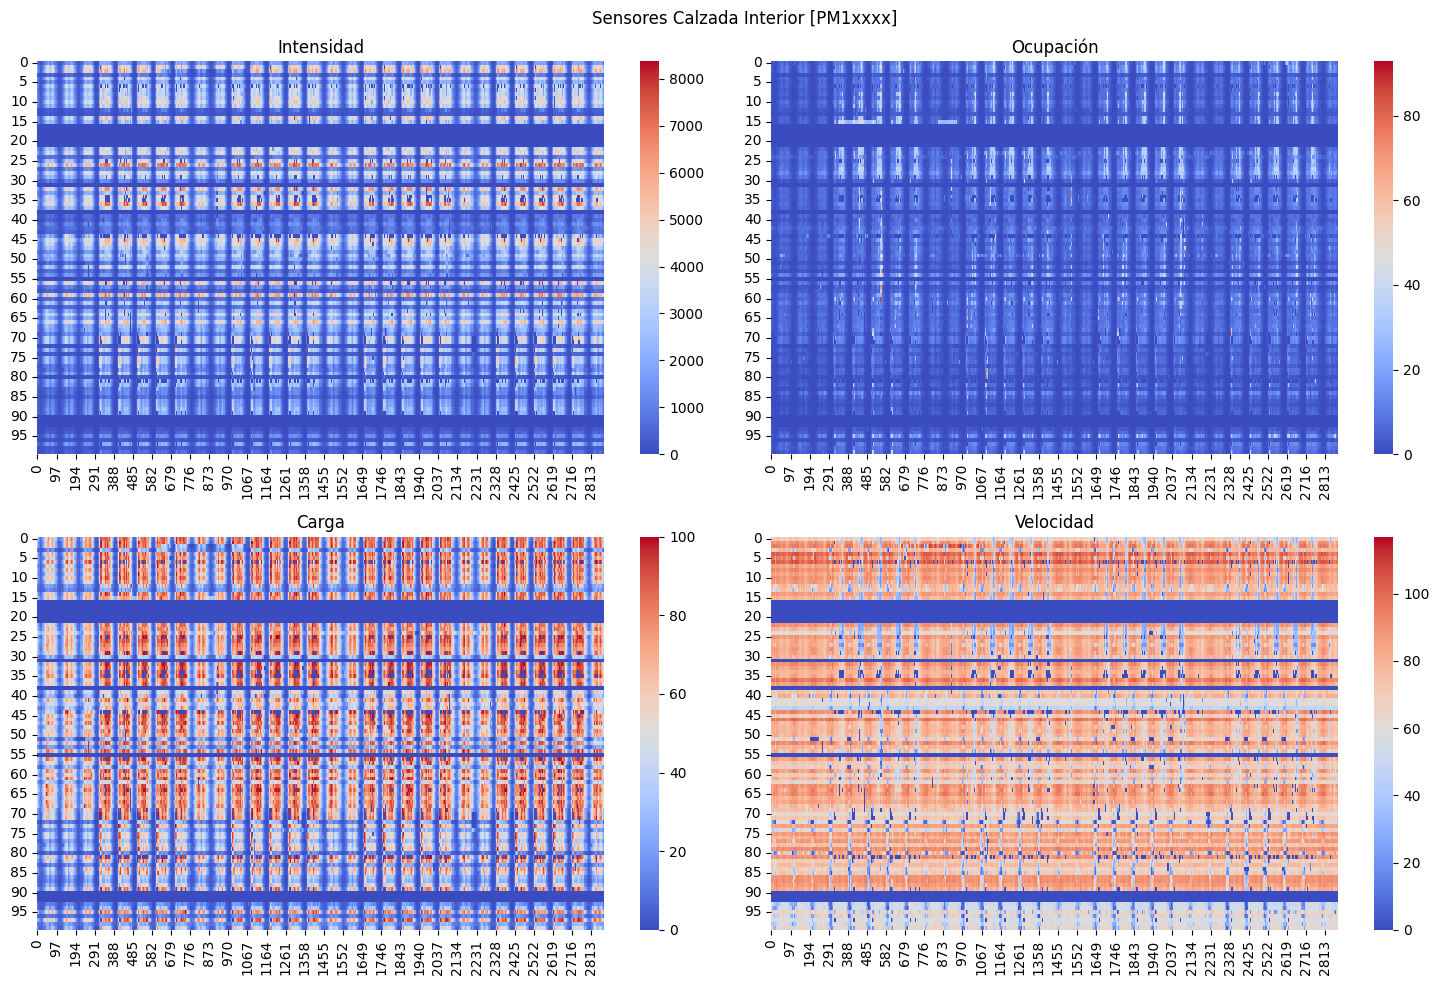

In [126]:
print("Sensores Calzada Interior [PM1xxxx]",counter)
titulo = "Sensores Calzada Interior [PM1xxxx]"
archivo = "images/pm_11-2024_interior.png"
grafica4MapasCalor(grillaIntenPM1, grillaOcupaPM1, grillaCargaPM1, grillaVelocPM1, "Intensidad", "Ocupación", "Carga", "Velocidad", titulo, archivo)

Sensores de Calzada Interior - Troncal [PM1xxx1]: 42


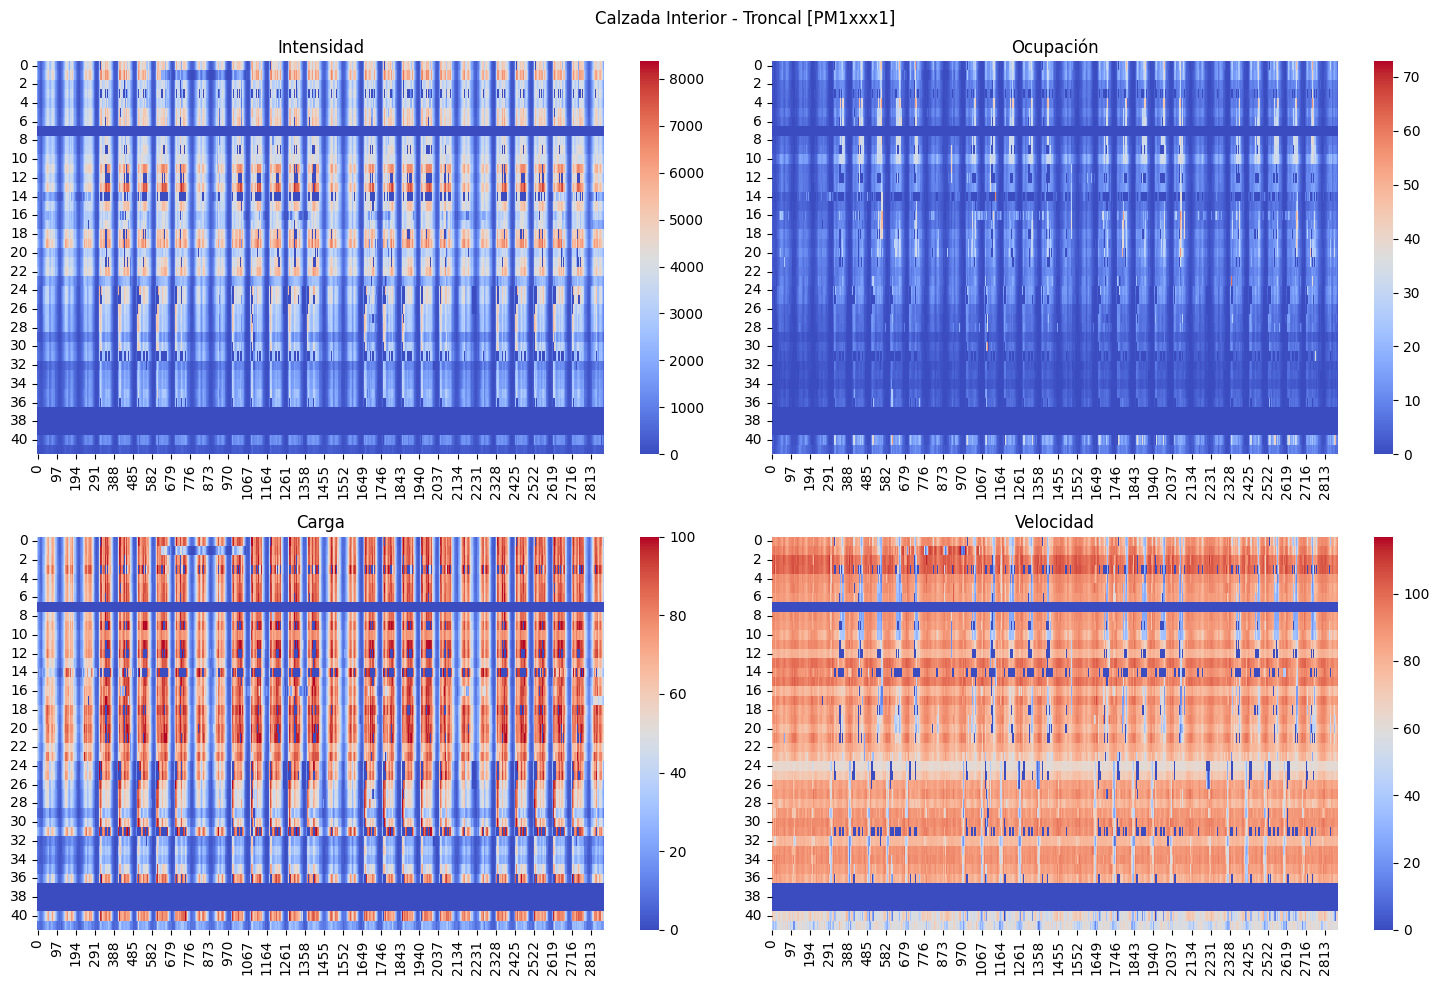

In [127]:
counter = 0
for cod in listaCodigos:
    if cod[2] == '1' and cod[6] == '1':
        idsen = diccCodId[cod]
        if idsen in posSensores:
            counter += 1

grillaIntenPM1 = np.zeros((counter,len(fechas)))
grillaOcupaPM1 = np.zeros((counter,len(fechas)))
grillaCargaPM1 = np.zeros((counter,len(fechas)))
grillaVelocPM1 = np.zeros((counter,len(fechas)))

print("Sensores de Calzada Interior - Troncal [PM1xxx1]:", counter)
sensoresPM1xxx1 = []

counter = 0
for cod in listaCodigos:
    if cod[2] == '1' and cod[6] == '1':
        idsen = diccCodId[cod]
        if idsen in posSensores:
            psensor = posSensores[idsen]
            grillaIntenPM1[counter] = grillaIntensidad[psensor]
            grillaOcupaPM1[counter] = grillaOcupacion[psensor]
            grillaCargaPM1[counter] = grillaCarga[psensor]
            grillaVelocPM1[counter] = grillaVelocidad[psensor]
            counter += 1
            sensoresPM1xxx1.append(idsen)

titulo = "Calzada Interior - Troncal [PM1xxx1]"
archivo = "images/pm_11-2024_interior_tronco.png"
grafica4MapasCalor(grillaIntenPM1, grillaOcupaPM1, grillaCargaPM1, grillaVelocPM1, "Intensidad", "Ocupación", "Carga", "Velocidad", titulo, archivo)

# Generar archivo con los datos
datafile = open("data_2024-11/data_PM1xxx1.txt","w")
datafile.write(str(len(sensoresPM1xxx1))+" "+str(len(fechas))+"\n")
for i in sensoresPM1xxx1:
    datafile.write(str(i)+" ")
datafile.write("\n")
for i in range(counter):
    for c in range(len(fechas)):
        datafile.write(str(int(grillaIntenPM1[i][c]))+" ")
    datafile.write("\n")
    for c in range(len(fechas)):
        datafile.write(str(int(grillaOcupaPM1[i][c]))+" ")
    datafile.write("\n")
    for c in range(len(fechas)):
        datafile.write(str(int(grillaCargaPM1[i][c]))+" ")
    datafile.write("\n")
    for c in range(len(fechas)):
        datafile.write(str(int(grillaVelocPM1[i][c]))+" ")
    datafile.write("\n")
datafile.close()

# Generando archivo de vecindad
vecinosfile = open("data_2024-11/vecinos_PM1xxx1.txt","w")
vecinosfile.write(str(len(sensoresPM1xxx1))+"\n")
for i in sensoresPM1xxx1:
    vecinosfile.write(str(i)+" ")
vecinosfile.write("\n")
for i in range(counter):
    vecinosfile.write(str(sensoresPM1xxx1[i])+" 1 "+str(sensoresPM1xxx1[i-1])+"\n")
vecinosfile.close()

Sensores de Calzada Interior - Lateral [PM1xxx2]: 27


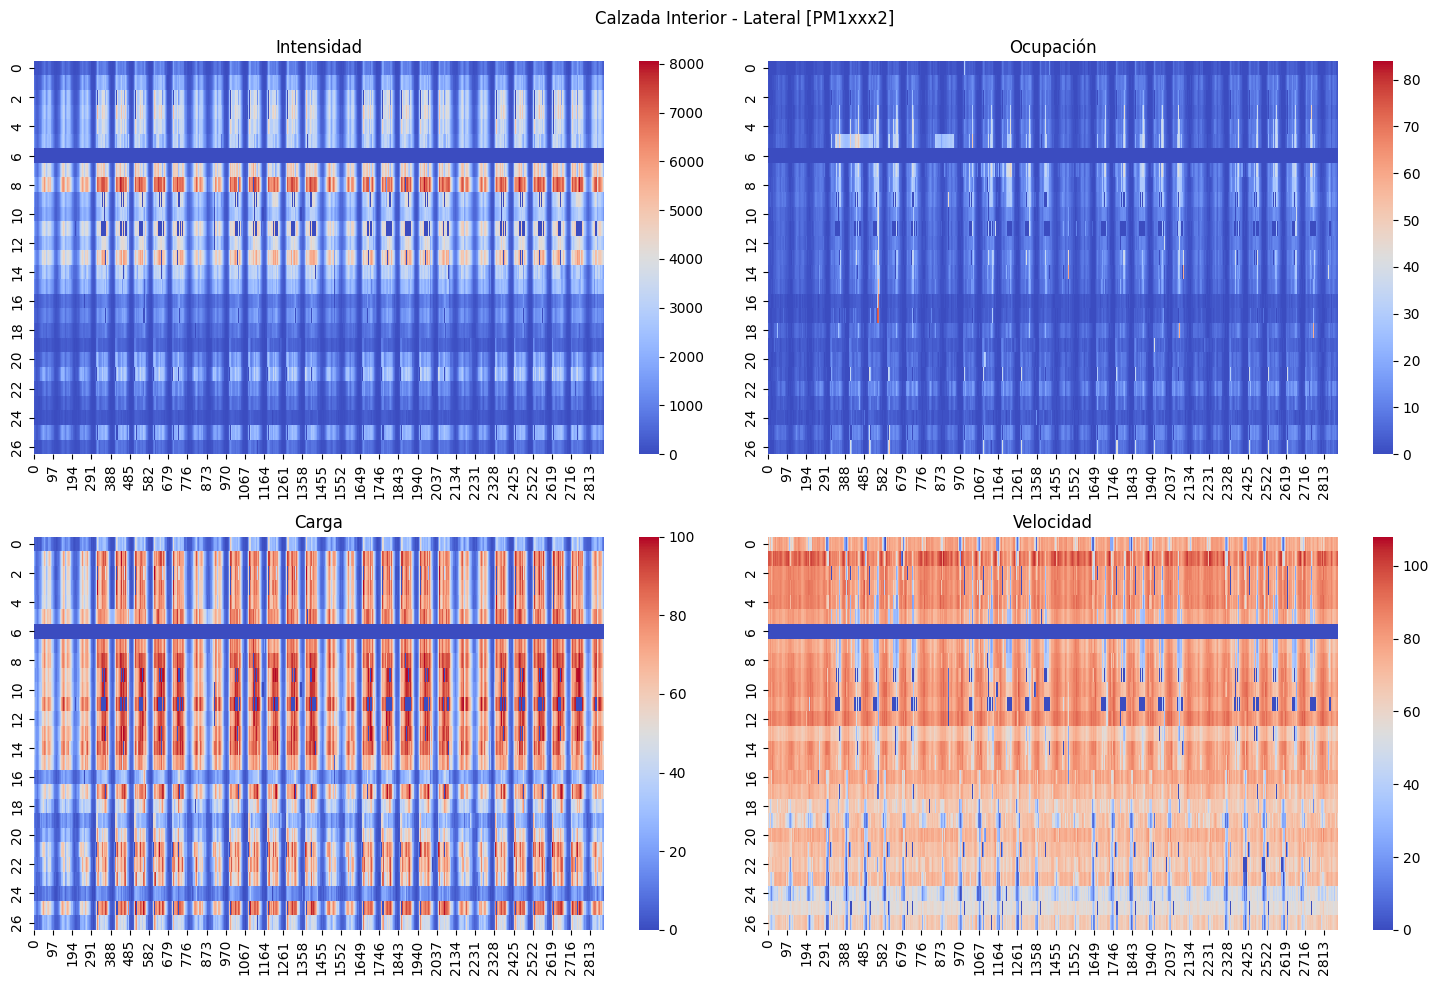

In [128]:
counter = 0
for cod in listaCodigos:
    if cod[2] == '1' and cod[6] == '2':
        idsen = diccCodId[cod]
        if idsen in posSensores:
            counter += 1

grillaIntenPM1 = np.zeros((counter,len(fechas)))
grillaOcupaPM1 = np.zeros((counter,len(fechas)))
grillaCargaPM1 = np.zeros((counter,len(fechas)))
grillaVelocPM1 = np.zeros((counter,len(fechas)))

print("Sensores de Calzada Interior - Lateral [PM1xxx2]:", counter)
sensoresPM1xxx2 = []

counter = 0
for cod in listaCodigos:
    if cod[2] == '1' and cod[6] == '2':
        idsen = diccCodId[cod]
        if idsen in posSensores:
            psensor = posSensores[idsen]
            grillaIntenPM1[counter] = grillaIntensidad[psensor]
            grillaOcupaPM1[counter] = grillaOcupacion[psensor]
            grillaCargaPM1[counter] = grillaCarga[psensor]
            grillaVelocPM1[counter] = grillaVelocidad[psensor]
            counter += 1
            sensoresPM1xxx2.append(idsen)

titulo = "Calzada Interior - Lateral [PM1xxx2]"
archivo = "images/pm_11-2024_interior_lateral.png"
grafica4MapasCalor(grillaIntenPM1, grillaOcupaPM1, grillaCargaPM1, grillaVelocPM1, "Intensidad", "Ocupación", "Carga", "Velocidad", titulo, archivo)

# Generar archivo con los datos
datafile = open("data_2024-11/data_PM1xxx2.txt","w")
datafile.write(str(len(sensoresPM1xxx2))+" "+str(len(fechas))+"\n")
for i in sensoresPM1xxx2:
    datafile.write(str(i)+" ")
datafile.write("\n")
for i in range(counter):
    for c in range(len(fechas)):
        datafile.write(str(int(grillaIntenPM1[i][c]))+" ")
    datafile.write("\n")
    for c in range(len(fechas)):
        datafile.write(str(int(grillaOcupaPM1[i][c]))+" ")
    datafile.write("\n")
    for c in range(len(fechas)):
        datafile.write(str(int(grillaCargaPM1[i][c]))+" ")
    datafile.write("\n")
    for c in range(len(fechas)):
        datafile.write(str(int(grillaVelocPM1[i][c]))+" ")
    datafile.write("\n")
datafile.close()

# Generando archivo de vecindad
vecinosfile = open("data_2024-11/vecinos_PM1xxx2.txt","w")
vecinosfile.write(str(len(sensoresPM1xxx2))+"\n")
for i in sensoresPM1xxx2:
    vecinosfile.write(str(i)+" ")
vecinosfile.write("\n")
for i in range(counter):
    vecinosfile.write(str(sensoresPM1xxx2[i])+" 1 "+str(sensoresPM1xxx2[i-1])+"\n")
vecinosfile.close()


Sensores Calzada Exterior [PM2xxxx] 87


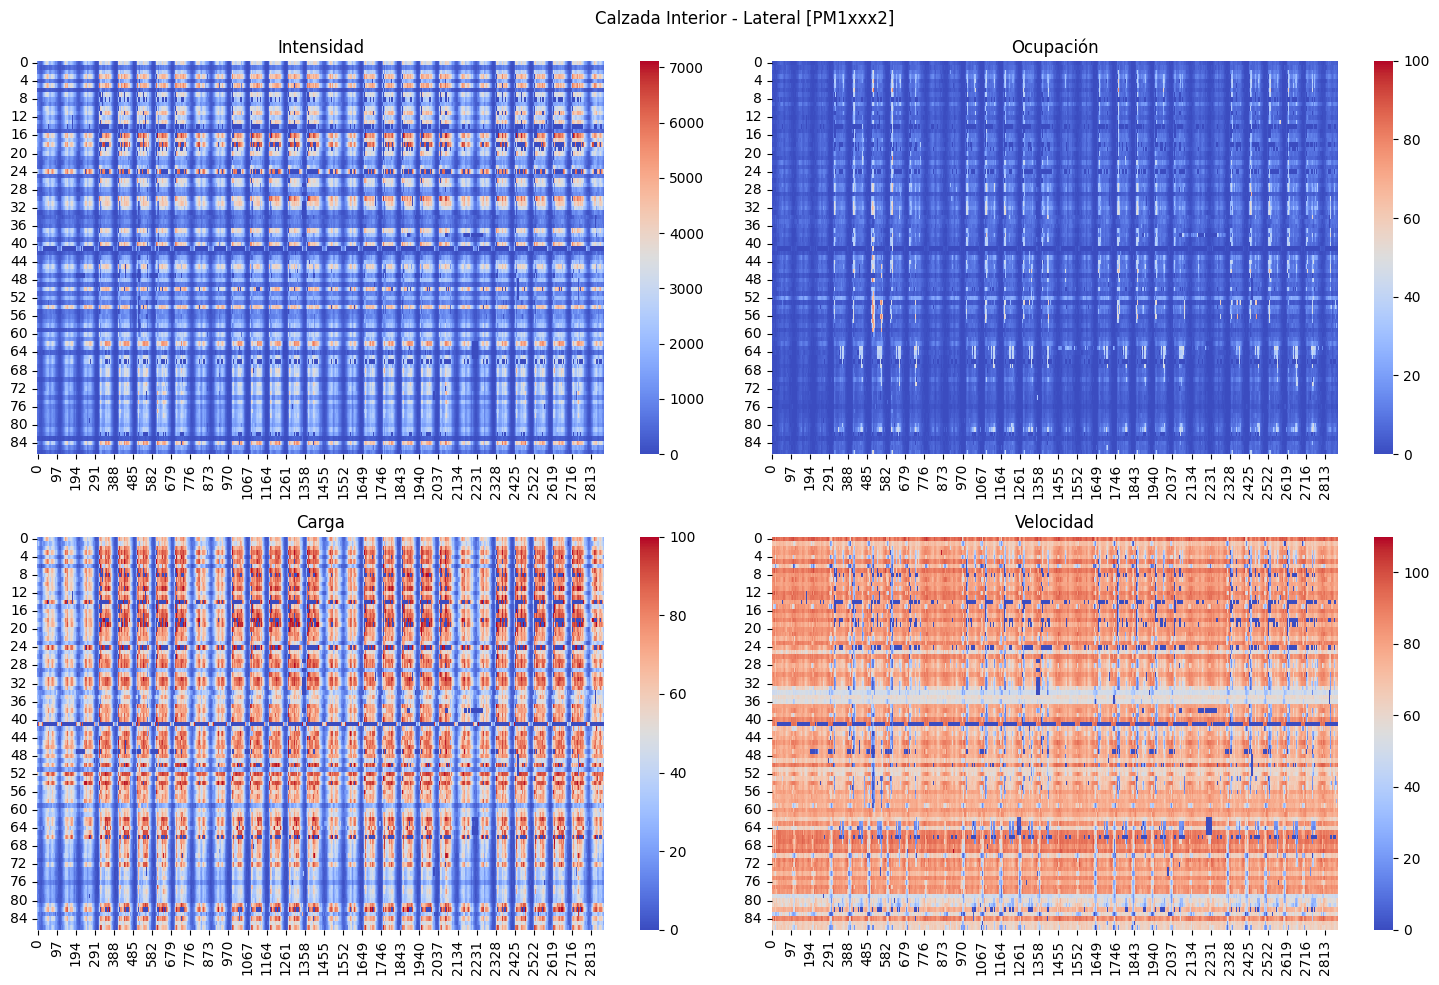

In [129]:
grillaIntenPM2 = np.zeros((PM2v,len(fechas)))
grillaOcupaPM2 = np.zeros((PM2v,len(fechas)))
grillaCargaPM2 = np.zeros((PM2v,len(fechas)))
grillaVelocPM2 = np.zeros((PM2v,len(fechas)))

counter = 0
for cod in listaCodigos:
    if cod[2] == '2':
        idsen = diccCodId[cod]
        if idsen in posSensores:
            psensor = posSensores[idsen]
            grillaIntenPM2[counter] = grillaIntensidad[psensor]
            grillaOcupaPM2[counter] = grillaOcupacion[psensor]
            grillaCargaPM2[counter] = grillaCarga[psensor]
            grillaVelocPM2[counter] = grillaVelocidad[psensor]
            counter += 1

print("Sensores Calzada Exterior [PM2xxxx]",counter)

title = "Calzada Exterior [PM2xxxx]"
archivo = "images/pm_11-2024_exterior.png"
grafica4MapasCalor(grillaIntenPM2, grillaOcupaPM2, grillaCargaPM2, grillaVelocPM2, "Intensidad", "Ocupación", "Carga", "Velocidad", titulo, archivo)

Sensores de Calzada Exterior - Troncal [PM2xxx1]: 38


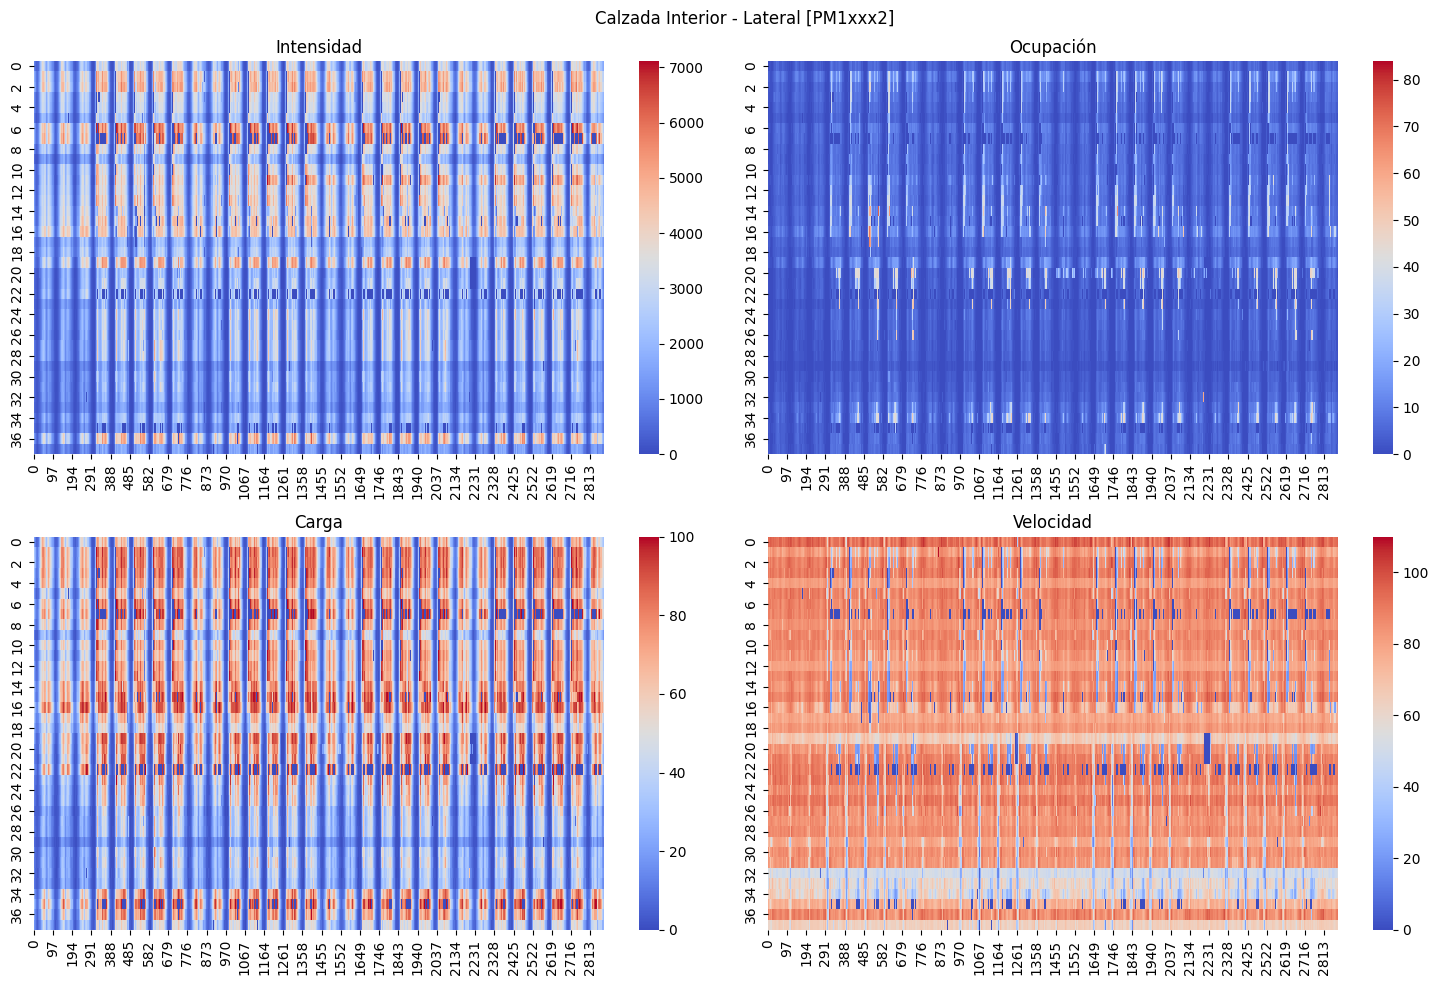

In [130]:
counter = 0
for cod in listaCodigos:
    if cod[2] == '2' and cod[6] == '1':
        idsen = diccCodId[cod]
        if idsen in posSensores:
            counter += 1

grillaIntenPM2 = np.zeros((counter,len(fechas)))
grillaOcupaPM2 = np.zeros((counter,len(fechas)))
grillaCargaPM2 = np.zeros((counter,len(fechas)))
grillaVelocPM2 = np.zeros((counter,len(fechas)))

print("Sensores de Calzada Exterior - Troncal [PM2xxx1]:", counter)
sensoresPM2xxx1 = []

counter = 0
for cod in listaCodigos:
    if cod[2] == '2' and cod[6] == '1':
        idsen = diccCodId[cod]
        if idsen in posSensores:
            psensor = posSensores[idsen]
            grillaIntenPM2[counter] = grillaIntensidad[psensor]
            grillaOcupaPM2[counter] = grillaOcupacion[psensor]
            grillaCargaPM2[counter] = grillaCarga[psensor]
            grillaVelocPM2[counter] = grillaVelocidad[psensor]
            counter += 1
            sensoresPM2xxx1.append(idsen)

title = "Calzada Exterior - Troncal [PM2xxx1]"
archivo = "images/pm_11-2024_exterior_tronco.png"
grafica4MapasCalor(grillaIntenPM2, grillaOcupaPM2, grillaCargaPM2, grillaVelocPM2, "Intensidad", "Ocupación", "Carga", "Velocidad", titulo, archivo)


# Generar archivo con los datos
datafile = open("data_2024-11/data_PM2xxx1.txt","w")
datafile.write(str(len(sensoresPM2xxx1))+" "+str(len(fechas))+"\n")
for i in sensoresPM2xxx1:
    datafile.write(str(i)+" ")
datafile.write("\n")
for i in range(counter):
    for c in range(len(fechas)):
        datafile.write(str(int(grillaIntenPM2[i][c]))+" ")
    datafile.write("\n")
    for c in range(len(fechas)):
        datafile.write(str(int(grillaOcupaPM2[i][c]))+" ")
    datafile.write("\n")
    for c in range(len(fechas)):
        datafile.write(str(int(grillaCargaPM2[i][c]))+" ")
    datafile.write("\n")
    for c in range(len(fechas)):
        datafile.write(str(int(grillaVelocPM2[i][c]))+" ")
    datafile.write("\n")
datafile.close()

# Generando archivo de vecindad
vecinosfile = open("data_2024-11/vecinos_PM2xxx1.txt","w")
vecinosfile.write(str(len(sensoresPM2xxx1))+"\n")
for i in sensoresPM2xxx1:
    vecinosfile.write(str(i)+" ")
vecinosfile.write("\n")
for i in range(counter):
    vecinosfile.write(str(sensoresPM2xxx1[i])+" 1 "+str(sensoresPM2xxx1[i-1])+"\n")
vecinosfile.close()


Sensores de Calzada Exterior - Lateral [PM2xxx2]: 23


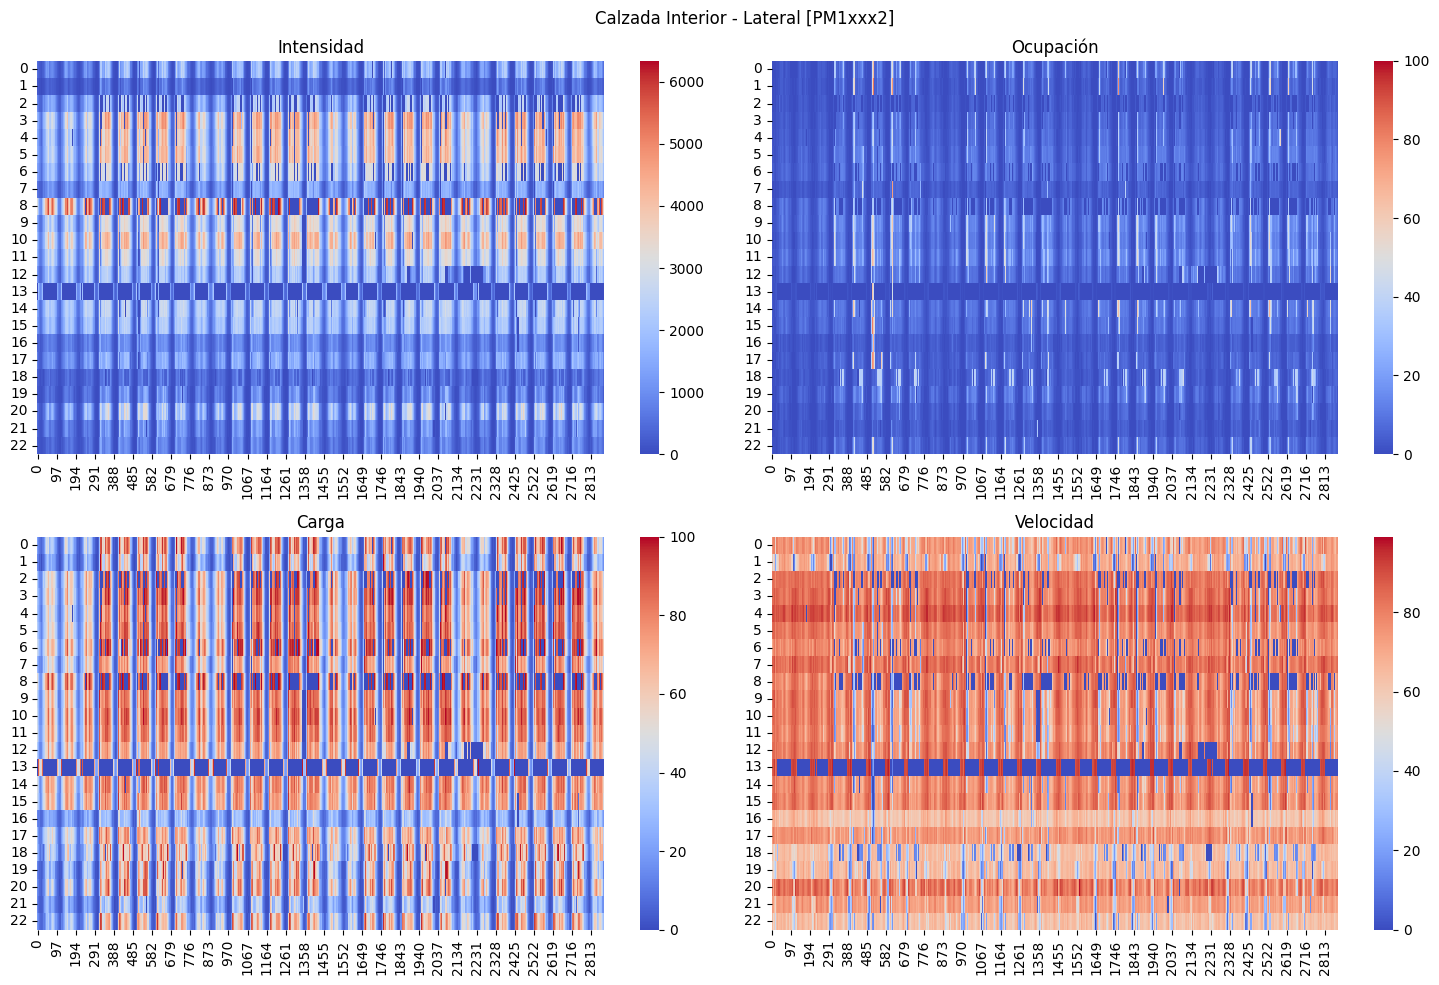

In [131]:
counter = 0
for cod in listaCodigos:
    if cod[2] == '2' and cod[6] == '2':
        idsen = diccCodId[cod]
        if idsen in posSensores:
            counter += 1

grillaIntenPM2 = np.zeros((counter,len(fechas)))
grillaOcupaPM2 = np.zeros((counter,len(fechas)))
grillaCargaPM2 = np.zeros((counter,len(fechas)))
grillaVelocPM2 = np.zeros((counter,len(fechas)))

print("Sensores de Calzada Exterior - Lateral [PM2xxx2]:", counter)
sensoresPM2xxx2 = []

counter = 0
for cod in listaCodigos:
    if cod[2] == '2' and cod[6] == '2':
        idsen = diccCodId[cod]
        if idsen in posSensores:
            psensor = posSensores[idsen]
            grillaIntenPM2[counter] = grillaIntensidad[psensor]
            grillaOcupaPM2[counter] = grillaOcupacion[psensor]
            grillaCargaPM2[counter] = grillaCarga[psensor]
            grillaVelocPM2[counter] = grillaVelocidad[psensor]
            counter += 1
            sensoresPM2xxx2.append(idsen)

title = "Calzada Exterior - Lateral [PM2xxx2]"
archivo = "images/pm_11-2024_exterior_lateral.png"
grafica4MapasCalor(grillaIntenPM2, grillaOcupaPM2, grillaCargaPM2, grillaVelocPM2, "Intensidad", "Ocupación", "Carga", "Velocidad", titulo, archivo)


# Generar archivo con los datos
datafile = open("data_2024-11/data_PM2xxx2.txt","w")
datafile.write(str(len(sensoresPM2xxx2))+" "+str(len(fechas))+"\n")
for i in sensoresPM2xxx2:
    datafile.write(str(i)+" ")
datafile.write("\n")
for i in range(counter):
    for c in range(len(fechas)):
        datafile.write(str(int(grillaIntenPM2[i][c]))+" ")
    datafile.write("\n")
    for c in range(len(fechas)):
        datafile.write(str(int(grillaOcupaPM2[i][c]))+" ")
    datafile.write("\n")
    for c in range(len(fechas)):
        datafile.write(str(int(grillaCargaPM2[i][c]))+" ")
    datafile.write("\n")
    for c in range(len(fechas)):
        datafile.write(str(int(grillaVelocPM2[i][c]))+" ")
    datafile.write("\n")
datafile.close()

# Generando archivo de vecindad
vecinosfile = open("data_2024-11/vecinos_PM2xxx2.txt","w")
vecinosfile.write(str(len(sensoresPM2xxx2))+"\n")
for i in sensoresPM2xxx2:
    vecinosfile.write(str(i)+" ")
vecinosfile.write("\n")
for i in range(counter):
    vecinosfile.write(str(sensoresPM2xxx2[i])+" 1 "+str(sensoresPM2xxx2[i-1])+"\n")
vecinosfile.close()

Sensores de Calzada Interior - Troncal y Lateral [PM1xxx[1-2]]: 69


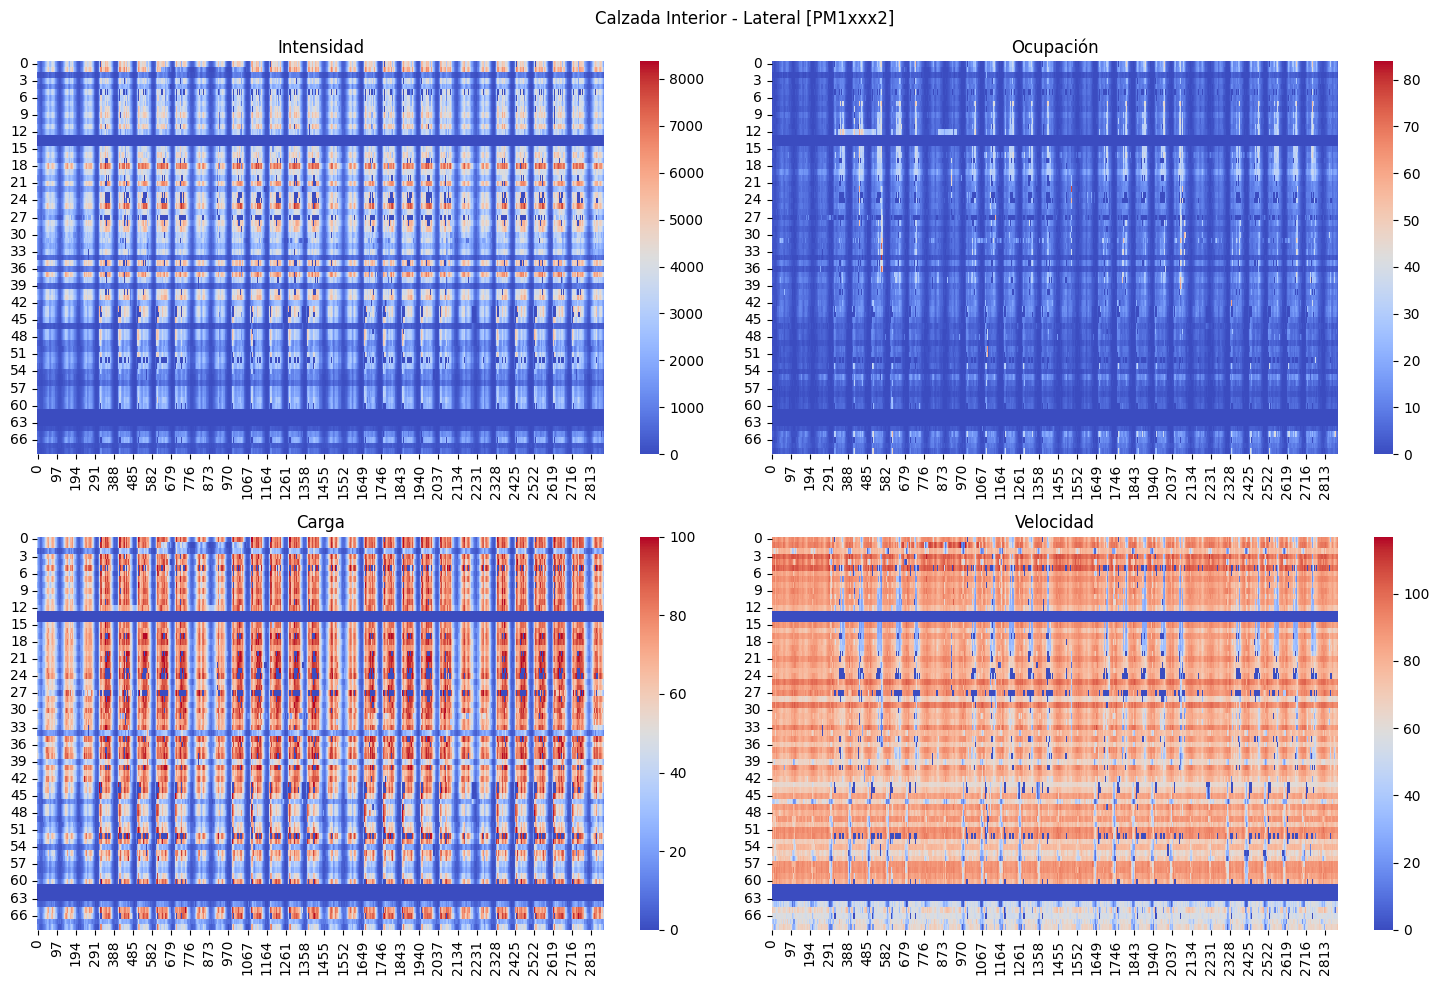

In [132]:
counter = 0
for cod in listaCodigos:
    if cod[2] == '1' and (cod[6] == '1' or cod[6] == '2'):
        idsen = diccCodId[cod]
        if idsen in posSensores:
            counter += 1

grillaIntenPM1 = np.zeros((counter,len(fechas)))
grillaOcupaPM1 = np.zeros((counter,len(fechas)))
grillaCargaPM1 = np.zeros((counter,len(fechas)))
grillaVelocPM1 = np.zeros((counter,len(fechas)))

print("Sensores de Calzada Interior - Troncal y Lateral [PM1xxx[1-2]]:", counter)
sensoresPM1xxx2 = []

counter = 0
for cod in listaCodigos:
    if cod[2] == '1' and (cod[6] == '1' or cod[6] == '2'):
        idsen = diccCodId[cod]
        if idsen in posSensores:
            psensor = posSensores[idsen]
            grillaIntenPM1[counter] = grillaIntensidad[psensor]
            grillaOcupaPM1[counter] = grillaOcupacion[psensor]
            grillaCargaPM1[counter] = grillaCarga[psensor]
            grillaVelocPM1[counter] = grillaVelocidad[psensor]
            counter += 1
            sensoresPM1xxx2.append(idsen)

title = "Calzada Interior - Troncal y Lateral [PM1xxx[1-2]]"
archivo = "images/pm_11-2024_interior_troncal-lateral.png"
grafica4MapasCalor(grillaIntenPM1, grillaOcupaPM1, grillaCargaPM1, grillaVelocPM1, "Intensidad", "Ocupación", "Carga", "Velocidad", titulo, archivo)


Sensores de Calzada Exterior - Troncal y Lateral [PM2xxx[1-2]]: 61


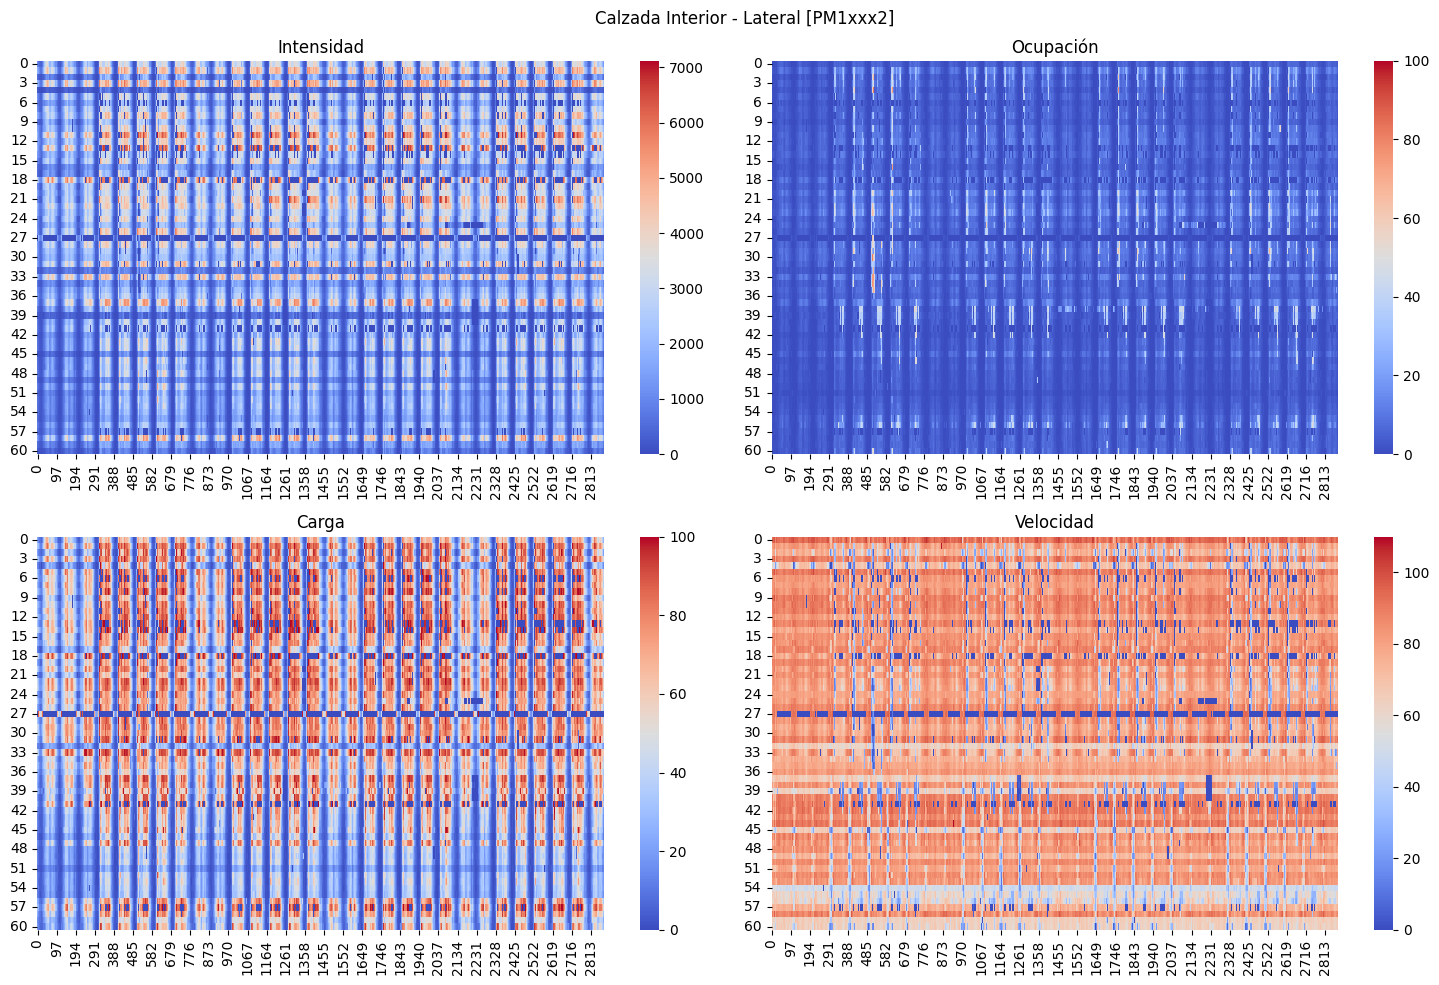

In [133]:
counter = 0
for cod in listaCodigos:
    if cod[2] == '2' and (cod[6] == '1' or cod[6] == '2'):
        idsen = diccCodId[cod]
        if idsen in posSensores:
            counter += 1

grillaIntenPM2 = np.zeros((counter,len(fechas)))
grillaOcupaPM2 = np.zeros((counter,len(fechas)))
grillaCargaPM2 = np.zeros((counter,len(fechas)))
grillaVelocPM2 = np.zeros((counter,len(fechas)))

print("Sensores de Calzada Exterior - Troncal y Lateral [PM2xxx[1-2]]:", counter)
sensoresPM2xxx2 = []

counter = 0
for cod in listaCodigos:
    if cod[2] == '2' and (cod[6] == '1' or cod[6] == '2'):
        idsen = diccCodId[cod]
        if idsen in posSensores:
            psensor = posSensores[idsen]
            grillaIntenPM2[counter] = grillaIntensidad[psensor]
            grillaOcupaPM2[counter] = grillaOcupacion[psensor]
            grillaCargaPM2[counter] = grillaCarga[psensor]
            grillaVelocPM2[counter] = grillaVelocidad[psensor]
            counter += 1
            sensoresPM2xxx2.append(idsen)

title = "Calzada Exterior - Troncal y Lateral [PM2xxx[1-2]]"
archivo = "images/pm_11-2024_exterior_troncal-lateral.png"
grafica4MapasCalor(grillaIntenPM2, grillaOcupaPM2, grillaCargaPM2, grillaVelocPM2, "Intensidad", "Ocupación", "Carga", "Velocidad", titulo, archivo)


In [134]:
# Generar archivo con los datos
datafile = open("data_2024-11/data_PM_random.txt","w")
datafile.write(str(len(sensores))+" "+str(len(fechas))+"\n")
for s in sensores:
    datafile.write(str(s)+" ")
datafile.write("\n")
counter = len(sensores)
for i in range(counter):
    for c in range(len(fechas)):
        datafile.write(str(int(grillaIntensidad[i][c]))+" ")
    datafile.write("\n")
    for c in range(len(fechas)):
        datafile.write(str(int(grillaOcupacion[i][c]))+" ")
    datafile.write("\n")
    for c in range(len(fechas)):
        datafile.write(str(int(grillaCarga[i][c]))+" ")
    datafile.write("\n")
    for c in range(len(fechas)):
        datafile.write(str(int(grillaVelocidad[i][c]))+" ")
    datafile.write("\n")
datafile.close()

# Generando archivo de vecindad
vecinosfile = open("data_2024-11/vecinos_PM_random.txt","w")
vecinosfile.write(str(len(sensores))+"\n")
for i in sensores:
    vecinosfile.write(str(i)+" ")
vecinosfile.write("\n")
for i in range(len(sensores)):
    vecinosfile.write(str(sensores[i]))
    numV = random.randint(1,3)
    vecinosfile.write(" " + str(numV) + " ")
    counter = 0
    while counter < numV:
        randV = random.randint(0,len(sensores)-1)
        if randV != i:
            vecinosfile.write(str(randV) + " ")
            counter += 1
    vecinosfile.write("\n")
vecinosfile.close()

In [135]:
print("Total sensores:", numsensores)
saltos = 15
print("Preview de distancias con saltos de", saltos, "entre sensores")
for x in range(0,numsensores, saltos):
    cooX = (data['latitud'][x],data['longitud'][x])
    for y in range(0,numsensores, saltos):
        cooY = (data['latitud'][y],data['longitud'][y])
        dKm = distance.distance(cooX, cooY).km
        print(str(round(dKm, 2)), end="\t")
    print("")

Total sensores: 305
Preview de distancias con saltos de 15 entre sensores
0.0	2.73	5.21	6.12	5.02	2.46	2.45	7.68	7.88	2.66	0.53	4.3	7.57	2.7	8.72	6.45	12.27	0.56	8.96	4.3	7.07	
2.73	0.0	7.66	3.46	2.34	0.4	5.11	6.93	5.17	0.09	3.25	6.84	5.08	0.3	6.26	8.41	13.51	3.19	6.23	1.6	4.46	
5.21	7.66	0.0	10.58	9.64	7.3	2.88	8.82	12.44	7.58	4.84	0.99	11.54	7.73	12.54	2.35	8.66	5.05	13.7	9.02	11.36	
6.12	3.46	10.58	0.0	1.13	3.66	8.34	6.4	1.86	3.52	6.64	9.89	1.85	3.61	2.98	10.77	14.75	6.62	3.21	1.87	1.02	
5.02	2.34	9.64	1.13	0.0	2.56	7.3	6.48	2.87	2.4	5.55	8.91	2.89	2.48	4.05	10.01	14.37	5.51	4.06	0.74	2.14	
2.46	0.4	7.3	3.66	2.56	0.0	4.79	6.68	5.42	0.31	2.99	6.49	5.2	0.63	6.37	8.01	13.12	2.95	6.53	1.84	4.63	
2.45	5.11	2.88	8.34	7.3	4.79	0.0	8.35	10.17	5.03	2.01	1.91	9.6	5.12	10.7	4.6	10.85	2.2	11.32	6.61	9.24	
7.68	6.93	8.82	6.4	6.48	6.68	8.35	0.0	7.62	6.88	8.01	8.72	5.72	7.23	6.01	7.57	9.07	8.19	9.05	6.58	6.35	
7.88	5.17	12.44	1.86	2.87	5.42	10.17	7.62	0.0	5.24	8.41	11.74	1.99	5.27	2.49	12.6	16.33	

In [136]:
dist0050 = []
dist0100 = []
dist0150 = []
dist0250 = []
dist0500 = []
dist0750 = []
dist1000 = []
print("Calculando vecinos con distintas distancias")
distMatrixVecinos = np.zeros((numsensores,numsensores))
for x in range(0,numsensores):
    cooX = (data['latitud'][x],data['longitud'][x])
    temDist0050 = 0
    temDist0100 = 0
    temDist0150 = 0
    temDist0250 = 0
    temDist0500 = 0
    temDist0750 = 0
    temDist1000 = 0
    for y in range(0,numsensores):
        if x != y:
            cooY = (data['latitud'][y],data['longitud'][y])
            dKm = distance.distance(cooX, cooY).km
            distMatrixVecinos[x][y] = dKm
            if dKm <= 1 :
                temDist1000 += 1
            if dKm <= 0.75:
                temDist0750 += 1
            if dKm <= 0.5:
                temDist0500 += 1
            if dKm <= 0.25:
                temDist0250 += 1
            if dKm <= 0.15:
                temDist0150 += 1
            if dKm <= 0.1:
                temDist0100 += 1
            if dKm <= 0.05:
                temDist0050 += 1
        else:
            distMatrixVecinos[x][y] = 0.0
    dist0050.append(temDist0050)
    dist0100.append(temDist0100)
    dist0150.append(temDist0150)
    dist0250.append(temDist0250)
    dist0500.append(temDist0500)
    dist0750.append(temDist0750)
    dist1000.append(temDist1000)
print("Listo")

Calculando vecinos con distintas distancias
Listo


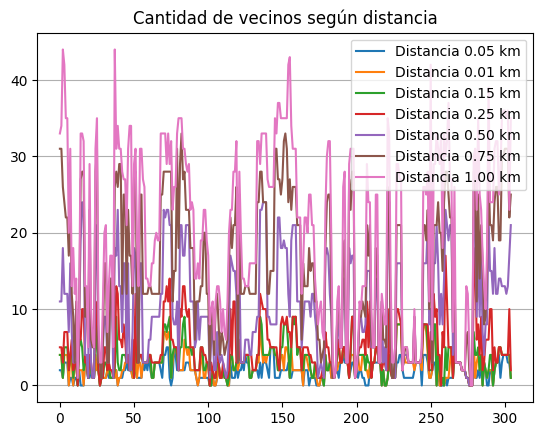

In [137]:
plt.plot(dist0050, label='Distancia 0.05 km')
plt.plot(dist0100, label='Distancia 0.01 km')
plt.plot(dist0150, label='Distancia 0.15 km')
plt.plot(dist0250, label='Distancia 0.25 km')
plt.plot(dist0500, label='Distancia 0.50 km')
plt.plot(dist0750, label='Distancia 0.75 km')
plt.plot(dist1000, label='Distancia 1.00 km')
plt.title("Cantidad de vecinos según distancia")
plt.savefig('images/histograma_11-2024_vecinos_x_distncia.png', bbox_inches='tight')
plt.grid(axis='y')
#plt.yscale('log')
plt.legend()
plt.show()
plt.close()

In [138]:
print(distMatrixVecinos)
print("Generando diccionario con vecinos de 50, 100, 150 y 250 metros.")
vec_dist_0050 = {}
vec_dist_0100 = {}
vec_dist_0150 = {}
vec_dist_0250 = {}
for x in range(0,numsensores):
    cooX = (data['latitud'][x],data['longitud'][x])
    temVec0050 = []
    temVec0100 = []
    temVec0150 = []
    temVec0250 = []
    for y in range(0,numsensores):
        if x != y:
            if distMatrixVecinos[x][y] <= 0.05:
                temVec0050.append(data['id'][y])
            if distMatrixVecinos[x][y] <= 0.1:
                temVec0100.append(data['id'][y])
            if distMatrixVecinos[x][y] <= 0.15:
                temVec0150.append(data['id'][y])
            if distMatrixVecinos[x][y] <= 0.25:
                temVec0250.append(data['id'][y])
    if len(temVec0050) > 0:
        vec_dist_0050[data['id'][x]] = temVec0050
    if len(temVec0100) > 0:
        vec_dist_0100[data['id'][x]] = temVec0100
    if len(temVec0150) > 0:
        vec_dist_0150[data['id'][x]] = temVec0150
    if len(temVec0250) > 0:
        vec_dist_0250[data['id'][x]] = temVec0250

# Comprobando coincidencia en el largo de la lista de vecinos
for i in range(5):
    tempID = data['id'][i]
    print("Elemento", i, "con id:", tempID)
    print(dist0050[i], len(vec_dist_0050[tempID]), vec_dist_0050[tempID])
    print(dist0100[i], len(vec_dist_0100[tempID]), vec_dist_0100[tempID])
    print(dist0150[i], len(vec_dist_0150[tempID]), vec_dist_0150[tempID])
    print(dist0250[i], len(vec_dist_0250[tempID]), vec_dist_0250[tempID])


[[0.         0.01807533 0.85070637 ... 7.05128765 7.6960984  7.06824645]
 [0.01807533 0.         0.83313672 ... 7.0654067  7.7080908  7.08279064]
 [0.85070637 0.83313672 0.         ... 7.82917706 8.4067817  7.85821943]
 ...
 [7.05128765 7.0654067  7.82917706 ... 0.         1.41439503 0.27339168]
 [7.6960984  7.7080908  8.4067817  ... 1.41439503 0.         1.66692647]
 [7.06824645 7.08279064 7.85821943 ... 0.27339168 1.66692647 0.        ]]
Generando diccionario con vecinos de 50, 100, 150 y 250 metros.
Elemento 0 con id: 3488
2 2 [np.int64(3489), np.int64(6666)]
4 4 [np.int64(3489), np.int64(6666), np.int64(6737), np.int64(6738)]
4 4 [np.int64(3489), np.int64(6666), np.int64(6737), np.int64(6738)]
5 5 [np.int64(3489), np.int64(6666), np.int64(6737), np.int64(6738), np.int64(10174)]
Elemento 1 con id: 3489
2 2 [np.int64(3488), np.int64(6666)]
4 4 [np.int64(3488), np.int64(6666), np.int64(6737), np.int64(6738)]
4 4 [np.int64(3488), np.int64(6666), np.int64(6737), np.int64(6738)]
5 5 [np.

In [139]:
print(len(vec_dist_0050))
print(len(vec_dist_0100))
print(len(vec_dist_0150))
print(len(vec_dist_0250))

263
276
288
298


In [140]:
print("Exportando los archivos de vecindad de 50 metros")
vecinosfile = open("data_2024-11/vecinos_PM_0050.txt","w")
vecinosfile.write(str(len(vec_dist_0050))+"\n")
for i in vec_dist_0050:
    vecinosfile.write(str(i)+" ")
vecinosfile.write("\n")
for i in vec_dist_0050:
    vecinosfile.write(str(i))
    vecinosfile.write(" " + str(len(vec_dist_0050[i])) + " ")
    for v in vec_dist_0050[i]:
        vecinosfile.write(str(v) + " ")
    vecinosfile.write("\n")
vecinosfile.close()
print("Completado!")

Exportando los archivos de vecindad de 50 metros
Completado!


In [141]:
print("Exportando los archivos de vecindad de 100 metros")
vecinosfile = open("data_2024-11/vecinos_PM_0100.txt","w")
vecinosfile.write(str(len(vec_dist_0100))+"\n")
for i in vec_dist_0100:
    vecinosfile.write(str(i)+" ")
vecinosfile.write("\n")
for i in vec_dist_0100:
    vecinosfile.write(str(i))
    vecinosfile.write(" " + str(len(vec_dist_0100[i])) + " ")
    for v in vec_dist_0100[i]:
        vecinosfile.write(str(v) + " ")
    vecinosfile.write("\n")
vecinosfile.close()
print("Completado!")

Exportando los archivos de vecindad de 100 metros
Completado!


In [142]:
print("Exportando los archivos de vecindad de 150 metros")
vecinosfile = open("data_2024-11/vecinos_PM_0150.txt","w")
vecinosfile.write(str(len(vec_dist_0150))+"\n")
for i in vec_dist_0150:
    vecinosfile.write(str(i)+" ")
vecinosfile.write("\n")
for i in vec_dist_0150:
    vecinosfile.write(str(i))
    vecinosfile.write(" " + str(len(vec_dist_0150[i])) + " ")
    for v in vec_dist_0150[i]:
        vecinosfile.write(str(v) + " ")
    vecinosfile.write("\n")
vecinosfile.close()
print("Completado!")

Exportando los archivos de vecindad de 150 metros
Completado!


In [143]:
print("Exportando los archivos de vecindad de 250 metros")
vecinosfile = open("data_2024-11/vecinos_PM_0250.txt","w")
vecinosfile.write(str(len(vec_dist_0250))+"\n")
for i in vec_dist_0250:
    vecinosfile.write(str(i)+" ")
vecinosfile.write("\n")
for i in vec_dist_0250:
    vecinosfile.write(str(i))
    vecinosfile.write(" " + str(len(vec_dist_0250[i])) + " ")
    for v in vec_dist_0250[i]:
        vecinosfile.write(str(v) + " ")
    vecinosfile.write("\n")
vecinosfile.close()
print("Completado!")

Exportando los archivos de vecindad de 250 metros
Completado!


In [144]:
print("Exportando archivo de datos con todos los sensores de la M30")
# Generar archivo con los datos
datafile = open("data_2024-11/data_PMxxxxx.txt","w")
datafile.write(str(len(listaCodigos))+" "+str(len(fechas))+"\n")
for i in listaCodigos:
    datafile.write(str(diccCodId[i])+" ")
datafile.write("\n")
for i in listaCodigos:
    psensor = posSensores[idsen]
    for c in range(len(fechas)):
        datafile.write(str(int(grillaIntensidad[psensor][c]))+" ")
    datafile.write("\n")
    for c in range(len(fechas)):
        datafile.write(str(int(grillaOcupacion[psensor][c]))+" ")
    datafile.write("\n")
    for c in range(len(fechas)):
        datafile.write(str(int(grillaCarga[psensor][c]))+" ")
    datafile.write("\n")
    for c in range(len(fechas)):
        datafile.write(str(int(grillaVelocidad[psensor][c]))+" ")
    datafile.write("\n")
datafile.close()

Exportando archivo de datos con todos los sensores de la M30


In [145]:
print("diccSensores:",len(diccSensores))
print("sensores:",len(sensores))

diccSensores: 286
sensores: 286


In [146]:
print("Exploración de los valores NAN en los datos de sensores de Madrid")
atributos = ["intensidad", "ocupacion", "carga", "vmed"]

nansZero = {}
nansNan = {}
grillaNans = np.zeros((len(sensores),len(fechas)))
totalNansZero = 0
totalNansNan = 0

for x in range(filas):
    s = df['id'][x]
    f = df['fecha'][x]
    ps = posSensores[s]
    pf = posFechas[f]

    if s not in nansZero:
        nansZero[s] = {}
        nansNan[s] = {}
        for a in atributos:
            nansZero[s][a] = 0
            nansNan[s][a] = 0
    
    for a in atributos:
        if df[a][x] == 'nan':
            nansNan[s][a] += 1
            totalNansNan += 1
            grillaNans[ps][pf] = -1
        if math.isnan(df[a][x]):
            nansZero[s][a] += 1
            totalNansZero += 1
            grillaNans[ps][pf] = -5

print("Total NaN (Zero):", totalNansZero)
print("Total NaN (isNan):", totalNansNan)


Exploración de los valores NAN en los datos de sensores de Madrid
Total NaN (Zero): 10830
Total NaN (isNan): 0


In [147]:
# Mostrando los datos de NaNsZero
for n in nansZero:
    for a in atributos:
        if nansZero[n][a] > 0:
            print("id:", n, "cod:", diccIdCod[n], a, nansZero[n][a], "nans")

id: 3488 cod: PM10712 vmed 4 nans
id: 3489 cod: PM10728 vmed 7 nans
id: 3493 cod: PM10865 vmed 25 nans
id: 3496 cod: PM32352 vmed 25 nans
id: 3510 cod: PM12961 vmed 97 nans
id: 3532 cod: PM21941 vmed 38 nans
id: 3533 cod: PM22081 vmed 38 nans
id: 3538 cod: PM40442 vmed 6 nans
id: 3559 cod: PM22392 vmed 5 nans
id: 3561 cod: PM30753 vmed 5 nans
id: 3706 cod: PM43022 vmed 4 nans
id: 3762 cod: PM41262 vmed 1 nans
id: 3800 cod: PM10612 vmed 19 nans
id: 3817 cod: PM10486 vmed 18 nans
id: 3821 cod: PM20025 vmed 14 nans
id: 3827 cod: PM40753 vmed 93 nans
id: 3838 cod: PM30902 vmed 18 nans
id: 6640 cod: PM10013 vmed 6 nans
id: 6642 cod: PM10091 vmed 3 nans
id: 6643 cod: PM10092 vmed 5 nans
id: 6645 cod: PM10142 vmed 7 nans
id: 6646 cod: PM10211 vmed 1 nans
id: 6652 cod: PM10343 vmed 1 nans
id: 6664 cod: PM10661 vmed 1 nans
id: 6668 cod: PM10768 vmed 4 nans
id: 6669 cod: PM10766 vmed 9 nans
id: 6670 cod: PM10902 vmed 1 nans
id: 6671 cod: PM10907 vmed 223 nans
id: 6673 cod: PM10942 vmed 2 nans
id

In [148]:
# Mostrando los datos de NaNs'nan?
for n in nansNan:
    for a in atributos:
        if nansNan[n][a] > 0:
            print("id:", n, "cod:", diccIdCod[n], a, nansNan[n][a], "nans")

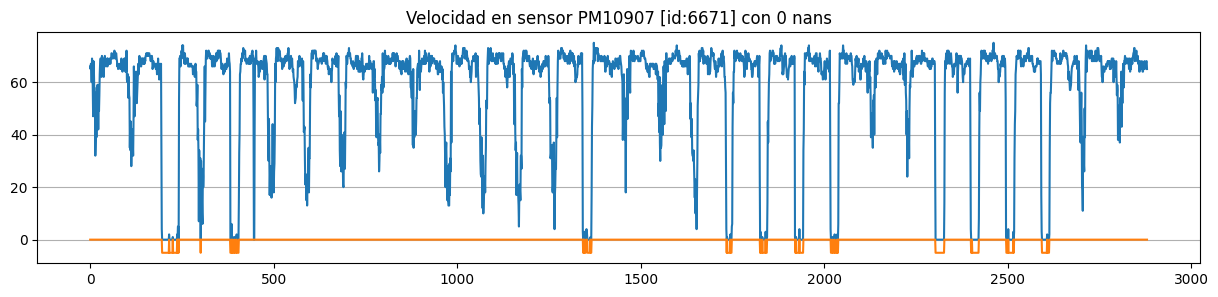

In [149]:
ids = 6671
pos = posSensores[ids]
plt.figure(figsize=(15,3))
plt.plot(grillaVelocidad[pos])
plt.plot(grillaNans[pos])
plt.title("Velocidad en sensor " + diccIdCod[ids] + " [id:" + str(ids) + "] con " + str(nansNan[ids]["vmed"]) + " nans")
plt.grid(axis='y')
plt.show()
plt.close()

In [150]:
ids = 1001
if ids in posSensores:
    pos = posSensores[ids]
    plt.figure(figsize=(15,3))
    plt.plot(grillaCarga[pos])
    plt.title("Carga en sensor " + diccIdCod[ids] + " [id:" + str(ids) + "]")
    plt.grid(axis='y')
    plt.show()
    plt.close()
else:
    print("No encontrado")

No encontrado


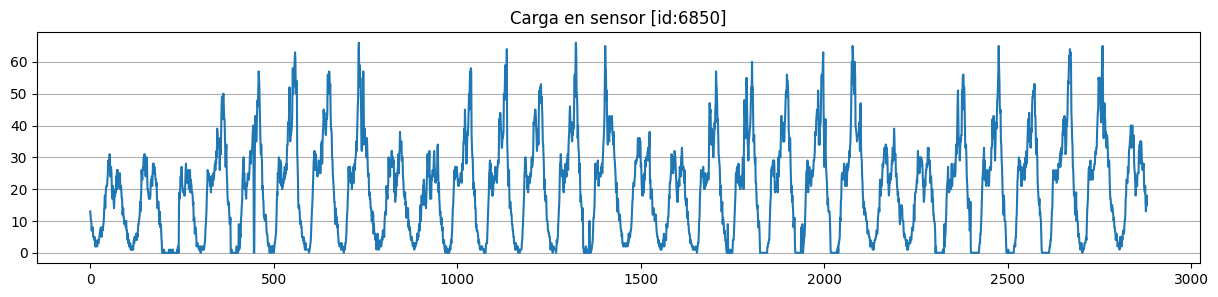

In [151]:
ids = 6850
valores = []
for x in range(filas):
    s = df['id'][x]    
    if s == ids:
        valores.append(df['carga'][x])
plt.figure(figsize=(15,3))
plt.plot(grillaCarga[pos])
plt.title("Carga en sensor [id:" + str(ids) + "]")
plt.grid(axis='y')
plt.show()
plt.close()


In [152]:
# Mostrar registros de un sensor:
ids = 3510
for a in df_encabezados:
    print(a, end="\t")
print("")
for x in range(filas):
    s = df['id'][x]    
    if s == ids:
        for a in df_encabezados:
            print(df[a][x], end="\t")
        print("")

id	fecha	tipo_elem	intensidad	ocupacion	carga	vmed	error	periodo_integracion	
3510	2024-11-11 10:15:00	M30	0	0	0	nan	N	12	
3510	2024-11-11 10:30:00	M30	0	0	0	nan	N	15	
3510	2024-11-11 10:45:00	M30	0	0	0	nan	N	15	
3510	2024-11-11 11:00:00	M30	0	0	0	nan	N	15	
3510	2024-11-11 11:15:00	M30	0	0	0	nan	N	15	
3510	2024-11-11 11:30:00	M30	0	0	0	nan	N	15	
3510	2024-11-11 11:45:00	M30	0	0	0	nan	N	15	
3510	2024-11-11 12:00:00	M30	0	0	0	nan	N	15	
3510	2024-11-11 12:15:00	M30	0	0	0	nan	N	15	
3510	2024-11-11 12:30:00	M30	0	0	0	nan	N	15	
3510	2024-11-11 12:45:00	M30	0	0	0	nan	N	15	
3510	2024-11-11 13:00:00	M30	0	0	0	nan	N	15	
3510	2024-11-11 13:15:00	M30	0	0	0	nan	N	15	
3510	2024-11-11 13:30:00	M30	0	0	0	nan	N	15	
3510	2024-11-11 13:45:00	M30	0	0	0	nan	N	15	
3510	2024-11-11 14:00:00	M30	0	0	0	nan	N	14	
3510	2024-11-11 14:15:00	M30	0	0	0	nan	N	12	
3510	2024-11-11 14:30:00	M30	0	0	0	nan	N	14	
3510	2024-11-11 14:45:00	M30	0	0	0	nan	N	15	
3510	2024-11-11 15:00:00	M30	0	0	0	nan	N	15	
3510	2024-11-11 15:15:

In [2]:
def graficarDatosxIdSensor(ids):
    fig, axes = plt.subplots(4, 1, figsize=(15, 13))  # 4 filas, 1 columna
    for i in range(4):
        valores = []
        for x in range(filas):
            s = df['id'][x]    
            if s == ids:
                valores.append(df[atributos[i]][x])
        axes[i].plot(valores)
        axes[i].set_title(atributos[i])
        axes[i].grid(axis='y')
    fig.suptitle("Sensor [id:" + str(ids) + "]")
    fig.tight_layout()
    plt.show()
    plt.close()

In [3]:
ids = [6704,11376]
for i in ids:
    graficarDatosxIdSensor(i)
    print("------------------------------")

NameError: name 'plt' is not defined

In [4]:
ids = 6641
graficarDatosxIdSensor(ids)

NameError: name 'plt' is not defined